# Imports & setup

In [1]:
import nltk
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import re
import tempun

In [32]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.figsize'] = (4.5, 3)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"

In [33]:
plt.rcParams['font.size'] = 8
def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

# Load data

In [4]:
coins = pd.read_parquet("../data/coins_deities_df.parquet")

In [5]:
coins.head(5)

@id  \
1      http://numismatics.org/ocre/id/ric.4.ph_i.28A   
4       http://numismatics.org/ocre/id/ric.4.crl.191   
5          http://numismatics.org/ocre/id/ric.7.ar.2   
6  http://numismatics.org/ocre/id/ric.2_1(2).tit.288   
7      http://numismatics.org/ocre/id/ric.5.cara.745   

                                               @type ontology#hasAuthority  \
1  [http://www.w3.org/2004/02/skos/core#Concept, ...       philip_the_arab   
4  [http://www.w3.org/2004/02/skos/core#Concept, ...             caracalla   
5  [http://nomisma.org/ontology#TypeSeriesItem, h...         constantine_i   
6  [http://nomisma.org/ontology#TypeSeriesItem, h...                 titus   
7  [http://nomisma.org/ontology#TypeSeriesItem, h...             carausius   

  ontology#hasDenomination ontology#hasEndDate ontology#hasManufacture  \
1                   aureus          0247-01-01                  struck   
4                 denarius          0211-01-01                  struck   
5                  solidus          0313-01-01                  struck   
6               sestertius          0081-01-01                  struck   
7             antoninianus          0293-01-01                  struck   

  ontology#hasMaterial ontology#hasMint                 @id_obverse  \
1                   av             rome      ric.4.ph_i.28A#obverse   
4                   ar             rome       ric.4.crl.191#obverse   
5                   av          arelate          ric.7.ar.2#obverse   
6                   ae             rome  ric.2_1(2).tit.288#obverse   
7                   ar  uncertain_value      ric.5.cara.745#obverse   

  ontology#hasRegion                 @id_reverse ontology#hasStartDate  \
1              italy      ric.4.ph_i.28A#reverse            0244-01-01   
4              italy       ric.4.crl.191#reverse            0211-01-01   
5             gallia          ric.7.ar.2#reverse            0313-01-01   
6              italy  ric.2_1(2).tit.288#reverse            0080-01-01   
7          britannia      ric.5.cara.745#reverse            0286-01-01   

  ontology#representsObjectType source void#inDataset  \
1                          coin    ric                  
4                          coin    ric                  
5                          coin    ric                  
6                          coin    ric                  
7                          coin    ric                  

                             core#definition  \
1                        RIC IV Philip I 28A   
4                       RIC IV Caracalla 191   
5                          RIC VII Arelate 2   
6  RIC II, Part 1 (second edition) Titus 288   
7                        RIC V Carausius 745   

                              core#prefLabel   core#broader replaces  \
1                        RIC IV Philip I 28A  ric.4.ph_i.28            
4                       RIC IV Caracalla 191                           
5                          RIC VII Arelate 2                           
6  RIC II, Part 1 (second edition) Titus 288                           
7                        RIC V Carausius 745                           

  isReplacedBy core#exactMatch ontology#hasIssuer  \
1                                                   
4                                                   
5                                                   
6                                                   
7                                                   

                ontology#hasLegend_obverse ontology#hasPortrait_obverse  \
1                  IMP M IVL PHILIPPVS AVG              philip_the_arab   
4                  ANTONINVS PIVS AVG BRIT                    caracalla   
5                        LICINI-VS P F AVG                     licinius   
6  CAES DIVI AVG VESP F DOMITIANVS COS VII                     domitian   
7                             IMP CARAVSIV                    carausius   

                                 description_obverse  \
1  Bust of Philip the Arab, laureat

In [6]:
coins[coins["deities"].apply(lambda x: "Jupiter" in x)]

@id  \
44         http://numismatics.org/ocre/id/ric.4.mcs.75   
184    http://numismatics.org/ocre/id/ric.5.gall(2).47   
207    http://numismatics.org/ocre/id/ric.5.val_i.92aB   
241        http://numismatics.org/ocre/id/ric.5.dio.34   
282      http://numismatics.org/ocre/id/ric.5.cara.454   
...                                                ...   
51109     http://numismatics.org/ocre/id/ric.5.dio.494   
51163     http://numismatics.org/ocre/id/ric.5.car.128   
51224    http://numismatics.org/ocre/id/ric.3.com.553B   
51236     http://numismatics.org/ocre/id/ric.4.sa.141b   
51265      http://numismatics.org/ocre/id/ric.4.sa.561   

                                                   @type  \
44     [http://nomisma.org/ontology#TypeSeriesItem, h...   
184    [http://www.w3.org/2004/02/skos/core#Concept, ...   
207    [http://www.w3.org/2004/02/skos/core#Concept, ...   
241    [http://nomisma.org/ontology#TypeSeriesItem, h...   
282    [http://www.w3.org/2004/02/skos/core#Concept, ...   
...                                                  ...   
51109  [http://nomisma.org/ontology#TypeSeriesItem, h...   
51163  [http://www.w3.org/2004/02/skos/core#Concept, ...   
51224  [http://www.w3.org/2004/02/skos/core#Concept, ...   
51236  [http://www.w3.org/2004/02/skos/core#Concept, ...   
51265  [http://www.w3.org/2004/02/skos/core#Concept, ...   

      ontology#hasAuthority ontology#hasDenomination ontology#hasEndDate  \
44                 macrinus                   aureus          0218-01-01   
184               gallienus                   aureus          0268-01-01   
207                valerian             antoninianus          0254-01-01   
241                maximian             antoninianus          0294-01-01   
282               carausius             antoninianus          0293-01-01   
...                     ...                      ...                 ...   
51109              maximian                   aureus          0294-01-01   
51163                 carus             antoninianus          0283-01-01   
51224              commodus                       as          0189-01-01   
51236     severus_alexander                 denarius          0228-01-01   
51265     severus_alexander                dupondius          0231-01-01   

      ontology#hasManufacture ontology#hasMaterial    ontology#hasMint  \
44                     struck                   av                rome   
184                    struck                   av                rome   
207                    struck                   ar                rome   
241                    struck                   ar            lugdunum   
282                    struck                   ar     uncertain_value   
...                       ...                  ...                 ...   
51109                  struck                   av                rome   
51163                  struck                   ar  tripolis_phoenicia   
51224                  struck                   ae                rome   
51236                  struck                   ar                rome   
51265                  struck                   ae                rome   

                    @id_obverse ontology#hasRegion               @id_reverse  \
44         ric.4.mcs.75#obverse              italy      ric.4.mcs.75#reverse   
184    ric.5.gall(2).47#obverse              italy  ric.5.gall(2).47#reverse   
207    ric.5.val_i.92aB#obverse              italy  ric.5.val_i.92aB#reverse   
241        ric.5.dio.34#obverse             gallia      ric.5.dio.34#reverse   
282      ric.5.cara.454#obverse    uncertain_value    ric.5.cara.454#reverse   
...                         ...                ...                       ...   
51109     ric.5.dio.494#obverse              italy     ric.5.dio.494#reverse   
51163     ric.5.car.128#obverse          phoenicia     ric.5.car.128#reverse   
51224    ric.3.com.553B#obverse              italy    ric.3.com.553B#reverse   
51236     ric.4.sa.141b#obverse

In [7]:
# Wars and assasinations

wars = pd.read_csv("../data/wars-and-battles.csv")
wars["Duration"] = wars["Duration"] + 1
assassinated = pd.read_csv("../data/assassinated-emperors.csv")


In [8]:
coins["random_dates"] = coins.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10, seed=row.index), axis=1)

In [9]:
def get_first_random(random_dates):
    try:
        return random_dates[0]
    except:
        return None
coins["date_random"] = coins["random_dates"].apply(get_first_random)

In [10]:
coins.head(10)

@id  \
1       http://numismatics.org/ocre/id/ric.4.ph_i.28A   
4        http://numismatics.org/ocre/id/ric.4.crl.191   
5           http://numismatics.org/ocre/id/ric.7.ar.2   
6   http://numismatics.org/ocre/id/ric.2_1(2).tit.288   
7       http://numismatics.org/ocre/id/ric.5.cara.745   
8       http://numismatics.org/ocre/id/ric.6.anch.128   
9         http://numismatics.org/ocre/id/ric.5.aur.45   
13        http://numismatics.org/ocre/id/ric.5.pro.29   
15  http://numismatics.org/ocre/id/ric.2_3(2).hdn....   
17    http://numismatics.org/ocre/id/ric.3.m_aur.1397   

                                                @type ontology#hasAuthority  \
1   [http://www.w3.org/2004/02/skos/core#Concept, ...       philip_the_arab   
4   [http://www.w3.org/2004/02/skos/core#Concept, ...             caracalla   
5   [http://nomisma.org/ontology#TypeSeriesItem, h...         constantine_i   
6   [http://nomisma.org/ontology#TypeSeriesItem, h...                 titus   
7   [http://nomisma.org/ontology#TypeSeriesItem, h...             carausius   
8   [http://nomisma.org/ontology#TypeSeriesItem, h...        maximinus_daia   
9   [http://nomisma.org/ontology#TypeSeriesItem, h...              aurelian   
13  [http://www.w3.org/2004/02/skos/core#Concept, ...                probus   
15  [http://www.w3.org/2004/02/skos/core#Concept, ...               hadrian   
17  [http://nomisma.org/ontology#TypeSeriesItem, h...       marcus_aurelius   

   ontology#hasDenomination ontology#hasEndDate ontology#hasManufacture  \
1                    aureus          0247-01-01                  struck   
4                  denarius          0211-01-01                  struck   
5                   solidus          0313-01-01                  struck   
6                sestertius          0081-01-01                  struck   
7              antoninianus          0293-01-01                  struck   
8                    aureus          0311-01-01                  struck   
9              antoninianus          0275-01-01                  struck   
13             antoninianus          0282-01-01                  struck   
15                dupondius          0137-01-01                  struck   
17               sestertius          0164-01-01                  struck   

   ontology#hasMaterial  ontology#hasMint                  @id_obverse  \
1                    av              rome       ric.4.ph_i.28A#obverse   
4                    ar              rome        ric.4.crl.191#obverse   
5                    av           arelate           ric.7.ar.2#obverse   
6                    ae              rome   ric.2_1(2).tit.288#obverse   
7                    ar   uncertain_value       ric.5.cara.745#obverse   
8                    av  antiocheia_syria       ric.6.anch.128#obverse   
9                    ar              rome         ric.5.aur.45#obverse   
13                   ar          lugdunum         ric.5.pro.29#obverse   
15                   ae              rome  ric.2_3(2).hdn.2680#obverse   
17                   ae              rome     ric.3.m_aur.1397#obverse   

   ontology#hasRegion                  @id_reverse ontology#hasStartDate  \
1               italy       ric.4.ph_i.28A#reverse            0244-01-01   
4               italy        ric.4.crl.191#reverse            0211-01-01   
5              gallia           ric.7.ar.2#reverse            0313-01-01   
6               italy   ric.2_1(2).tit.288#reverse            0080-01-01   
7           britannia       ric.5.cara.745#reverse            0286-01-01   
8               syria       ric.6.anch.128#reverse            0310-01-01   
9               italy         ric.5.aur.45#reverse            0270-01-01   
13             gallia         ric.5.pro.29#reverse            0276-01-01   
15              italy  ric.2_3(2).hdn.2680#reverse            0137-01-01   
17              italy     ric.3.m_aur.1397#reverse            0163-01-01   

   ontology#representsObjectType source void#inDataset  \
1               

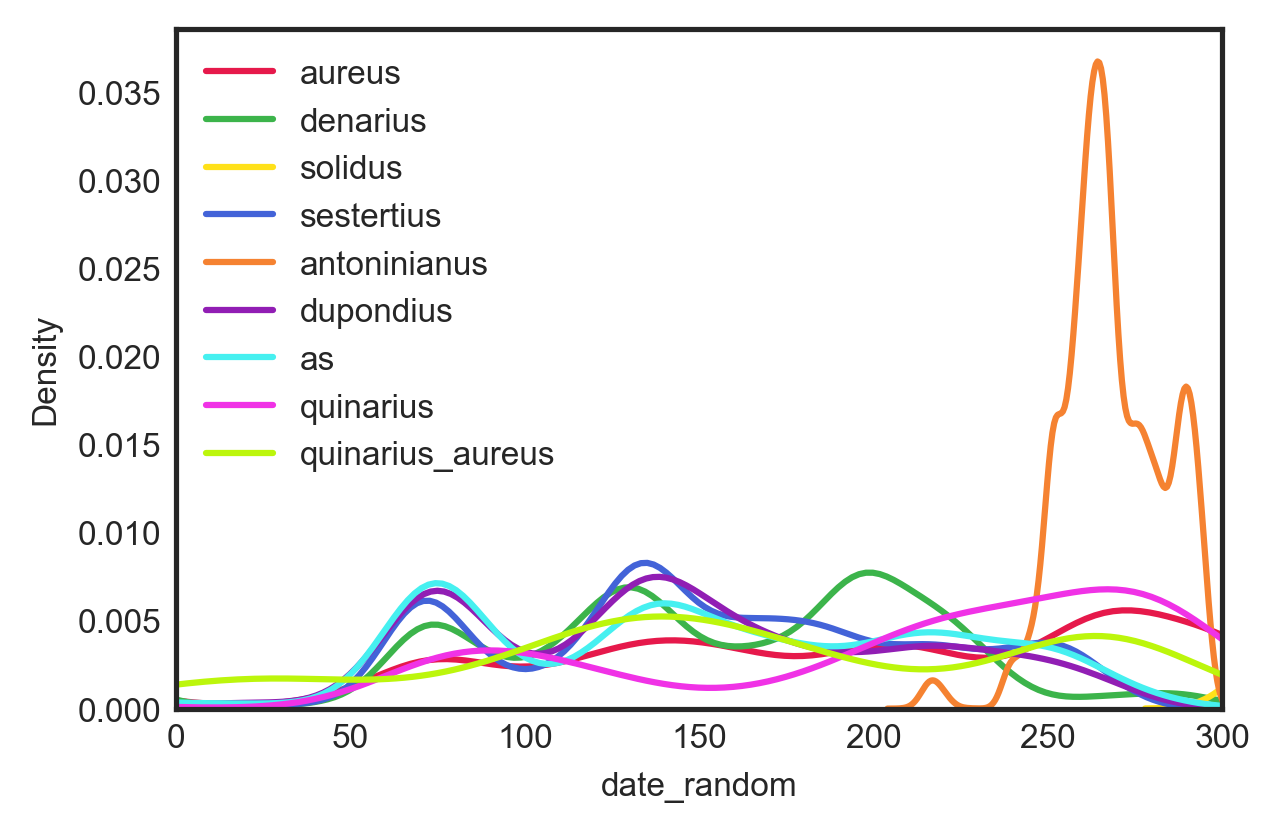

In [34]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_random"], color=color, label=type, ax=ax)
ax.set_xlim(0,300)
ax.legend()

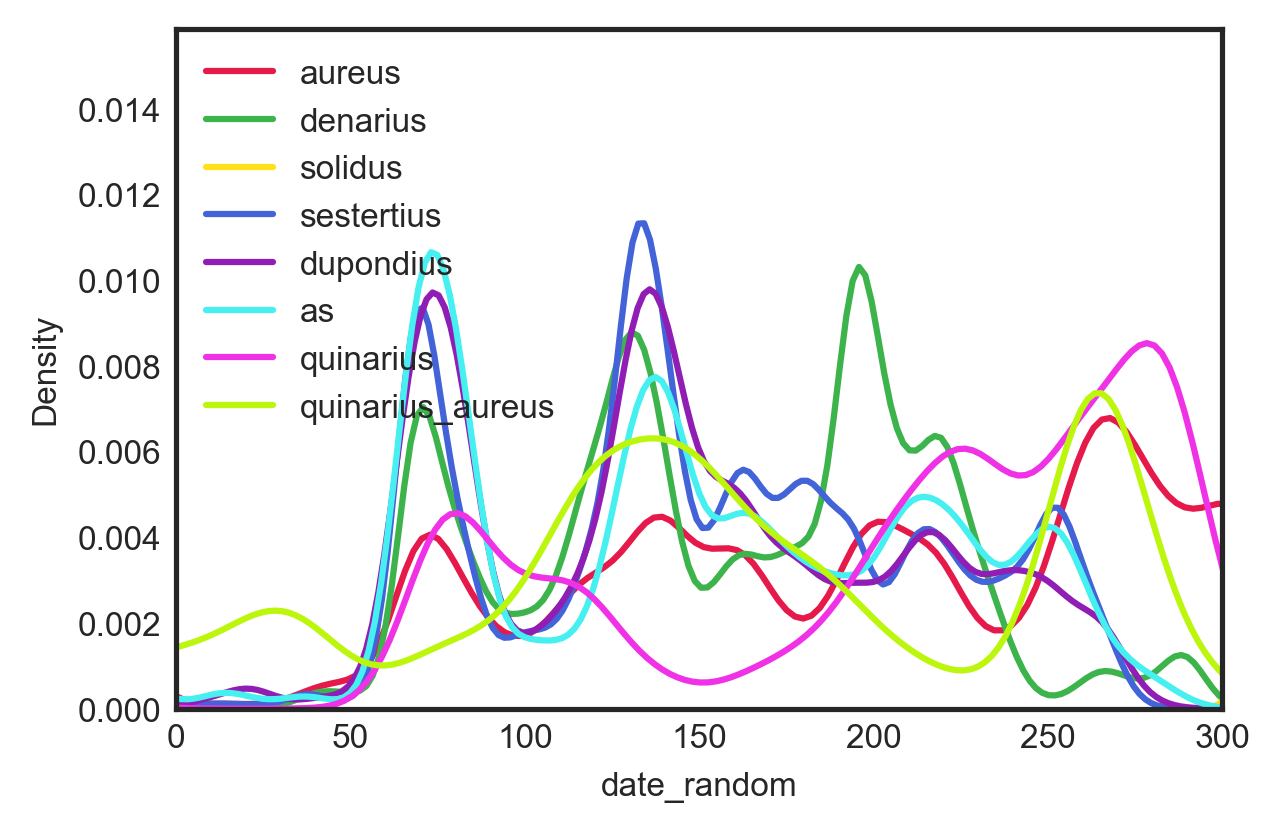

In [35]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    if type != "antoninianus":
        sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_random"], color=color, label=type, ax=ax, bw_adjust=0.5)
ax.set_xlim(0,300)
ax.legend()

In [36]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Jupiter', 1361),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480)]

In [37]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Jupiter', 1361),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480)]

In [38]:
deities_top20 = [tup[0] for tup in deities_top20_counts]

In [112]:
start, stop = -50, 350
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts = nltk.FreqDist(deities_list_flat_top20).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_top20)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                 "n" : 0,
                 "counts" : [],
                 "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': -50, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -49, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -48, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -47, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -46, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -45, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -44, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -43, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -42, 'n': 2, 'counts': [('rest', 2)], 'freqs_pct': [('rest', 100.0)]}
{'date': -41, 'n': 6, 'counts': [('Victory', 3), ('Pax', 1), ('rest', 2)], 'freqs_pct': [('Victory', 50.0), ('Pax', 16.67), ('rest', 33.33)]}
{'date': -40, 'n': 12, 'counts': [('Victory', 9), ('Pax', 1), ('rest', 2)], 'freqs_pct': [('Victory', 75.0), ('Pax', 8.33), ('rest', 16.67)]}
{'date': -39, 'n': 15, 'counts': [('Victory', 12), ('Pax', 1), ('rest', 2)], 'freqs_pct': [('Victory', 80.0), ('Pax', 6.67), ('rest', 13.33)]}
{'date': -38, 'n': 16, 'counts': [('Victory', 13), ('Pax', 1), ('rest'

In [113]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)

In [114]:
date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col !="rest"] + ["rest"]]

In [115]:
date_freqs_df.fillna(0, inplace=True) #,inplace=True)

In [116]:
date_freqs_df

Victory  Pax  Mars  Jupiter  Concordia  Securitas  Fortuna  Minerva  \
date                                                                        
-50      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-49      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-48      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-47      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-46      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
...       ...  ...   ...      ...        ...        ...      ...      ...   
 345    36.25  0.0  0.91      0.0        0.0       0.91      0.0      0.0   
 346    31.32  0.0  0.86      0.0        0.0       0.86      0.0      0.0   
 347    27.75  0.0  0.82      0.0        0.0       0.82      0.0      0.0   
 348    23.84  0.0  0.82      0.0        0.0       0.55      0.0      0.0   
 349    22.28  0.0  0.82      0.0        0.0       0.54      0.0      0.0   

      Spes   Roma  Liberalitas  Genius  Salus  Aequitas  Felicitas  Fides  \
date                                                                        
-50    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-49    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-48    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-47    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-46    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
...    ...    ...          ...     ...    ...       ...        ...    ...   
 345   0.0  23.26          0.0     0.0    0.0       0.0        0.0    0.0   
 346   0.0  26.15          0.0     0.0    0.0       0.0        0.0    0.0   
 347   0.0  28.30          0.0     0.0    0.0       0.0        0.0    0.0   
 348   0.0  30.41          0.0     0.0    0.0       0.0        0.0    0.0   
 349   0.0  31.25          0.0     0.0    0.0       0.0        0.0    0.0   

      Pietas  Hercules  Providentia  Sol   rest  
date                                             
-50      0.0       0.0          0.0  0.0   0.00  
-49      0.0       0.0          0.0  0.0   0.00  
-48      0.0       0.0          0.0  0.0   0.00  
-47      0.0       0.0          0.0  0.0   0.00  
-46      0.0       0.0          0.0  0.0   0.00  
...      ...       ...          ...  ...    ...  
 345     0.0       0.0          0.0  0.0  38.67  
 346     0.0       0.0          0.0  0.0  40.80  
 347     0.0       0.0          0.0  0.0  42.31  
 348     0.0       0.0          0.0  0.0  44.38  
 349     0.0       0.0          0.0  0.0  45.11  

[400 rows x 21 columns]

In [117]:
date_freqs_dict = date_freqs_df.to_dict("list")# ["column_dtypes]

In [118]:
len(date_freqs_dict)

21

In [119]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

In [120]:
date_freqs_df.columns

Index(['Victory', 'Pax', 'Mars', 'Jupiter', 'Concordia', 'Securitas',
       'Fortuna', 'Minerva', 'Spes', 'Roma', 'Liberalitas', 'Genius', 'Salus',
       'Aequitas', 'Felicitas', 'Fides', 'Pietas', 'Hercules', 'Providentia',
       'Sol', 'rest'],
      dtype='object')

In [121]:
deities_color_dict = dict(zip(date_freqs_df.columns, colors))
deities_color_dict

{'Victory': '#e6194b',
 'Pax': '#3cb44b',
 'Mars': '#ffe119',
 'Jupiter': '#4363d8',
 'Concordia': '#f58231',
 'Securitas': '#911eb4',
 'Fortuna': '#46f0f0',
 'Minerva': '#f032e6',
 'Spes': '#bcf60c',
 'Roma': '#fabebe',
 'Liberalitas': '#008080',
 'Genius': '#e6beff',
 'Salus': '#9a6324',
 'Aequitas': '#fffac8',
 'Felicitas': '#800000',
 'Fides': '#aaffc3',
 'Pietas': '#808000',
 'Hercules': '#ffd8b1',
 'Providentia': '#000075',
 'Sol': '#808080',
 'rest': 'lightgray'}

In [122]:
len(colors)

21

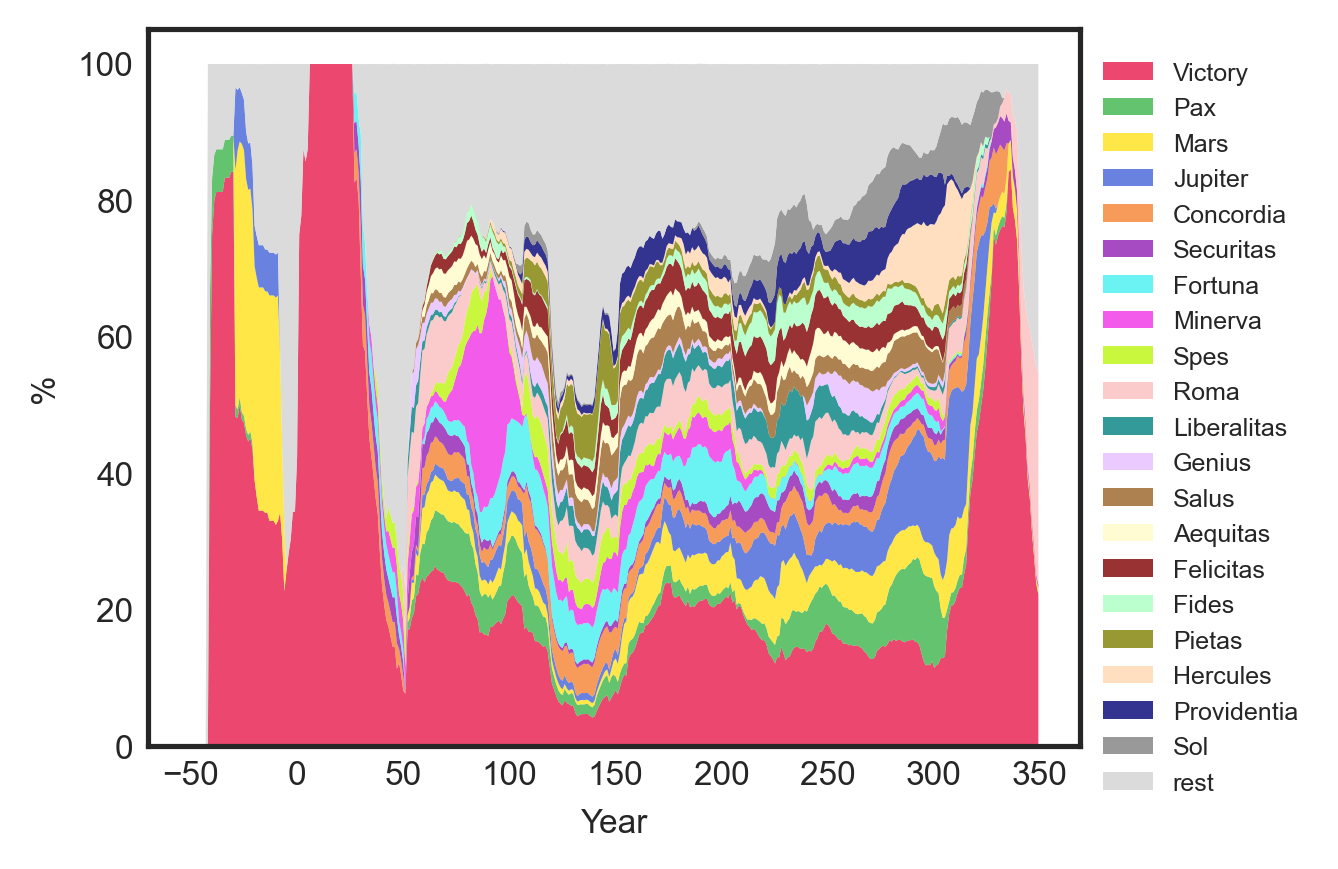

In [123]:
fig, ax = plt.subplots(dpi=300, tight_layout=True)
ax.stackplot(date_freqs_df.index, date_freqs_dict.values(),
             labels=date_freqs_dict.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1,-0.1), fontsize=6)
ax.set_xlabel('Year')
ax.set_ylabel('%')

for n in wars.index:
    war = dict(wars.iloc[n])
#    ax.axvspan(war["Start_date"], war["End_date"], color="darkgrey", alpha=0.5)

for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
#    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)

In [124]:
save_figure(fig, "deities_portions_over_time")

In [125]:
start, stop = -50, 350
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_bens = [d for d in deities_list_flat if d in ["Pax", "Securitas", "Felicitas", "Salus"]]
        deities_counts = nltk.FreqDist(deities_list_flat_bens).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_bens)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                     "n" : 0,
                     "counts" : [],
                     "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': -50, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -49, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -48, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -47, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -46, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -45, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -44, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -43, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -42, 'n': 2, 'counts': [('rest', 2)], 'freqs_pct': [('rest', 100.0)]}
{'date': -41, 'n': 6, 'counts': [('Pax', 1), ('rest', 5)], 'freqs_pct': [('Pax', 16.67), ('rest', 83.33)]}
{'date': -40, 'n': 12, 'counts': [('Pax', 1), ('rest', 11)], 'freqs_pct': [('Pax', 8.33), ('rest', 91.67)]}
{'date': -39, 'n': 15, 'counts': [('Pax', 1), ('rest', 14)], 'freqs_pct': [('Pax', 6.67), ('rest', 93.33)]}
{'date': -38, 'n': 16, 'counts': [('Pax', 1), ('rest', 15)], 'freqs_pct': [('Pax', 6.25), ('rest', 93.75)]}
{'date': -37, 'n': 16, 'counts': [('Pax', 1), ('rest', 15)], 'freq

In [126]:
date_freqs_df_4bens = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df_4bens.set_index("date", inplace=True)
date_freqs_df_4bens = date_freqs_df_4bens[["Securitas", "Pax", "Salus", "Felicitas", "rest"]]
date_freqs_df_4bens

Securitas  Pax  Salus  Felicitas   rest
date                                         
-50         NaN  NaN    NaN        NaN    NaN
-49         NaN  NaN    NaN        NaN    NaN
-48         NaN  NaN    NaN        NaN    NaN
-47         NaN  NaN    NaN        NaN    NaN
-46         NaN  NaN    NaN        NaN    NaN
...         ...  ...    ...        ...    ...
 345       0.91  NaN    NaN        NaN  99.09
 346       0.86  NaN    NaN        NaN  99.14
 347       0.82  NaN    NaN        NaN  99.18
 348       0.55  NaN    NaN        NaN  99.45
 349       0.54  NaN    NaN        NaN  99.46

[400 rows x 5 columns]

In [127]:
date_freqs_df_4bens.fillna(0, inplace=True)  #,inplace=True)
date_freqs_dict_4bens = date_freqs_df_4bens.to_dict("list")  # ["column_dtypes]

In [128]:
date_freqs_df_4bens

Securitas  Pax  Salus  Felicitas   rest
date                                         
-50        0.00  0.0    0.0        0.0   0.00
-49        0.00  0.0    0.0        0.0   0.00
-48        0.00  0.0    0.0        0.0   0.00
-47        0.00  0.0    0.0        0.0   0.00
-46        0.00  0.0    0.0        0.0   0.00
...         ...  ...    ...        ...    ...
 345       0.91  0.0    0.0        0.0  99.09
 346       0.86  0.0    0.0        0.0  99.14
 347       0.82  0.0    0.0        0.0  99.18
 348       0.55  0.0    0.0        0.0  99.45
 349       0.54  0.0    0.0        0.0  99.46

[400 rows x 5 columns]

In [129]:
colors = colors[:4] + ["lightgray"]
colors

['#e6194b', '#3cb44b', '#ffe119', '#4363d8', 'lightgray']

(0.0, 27.0)

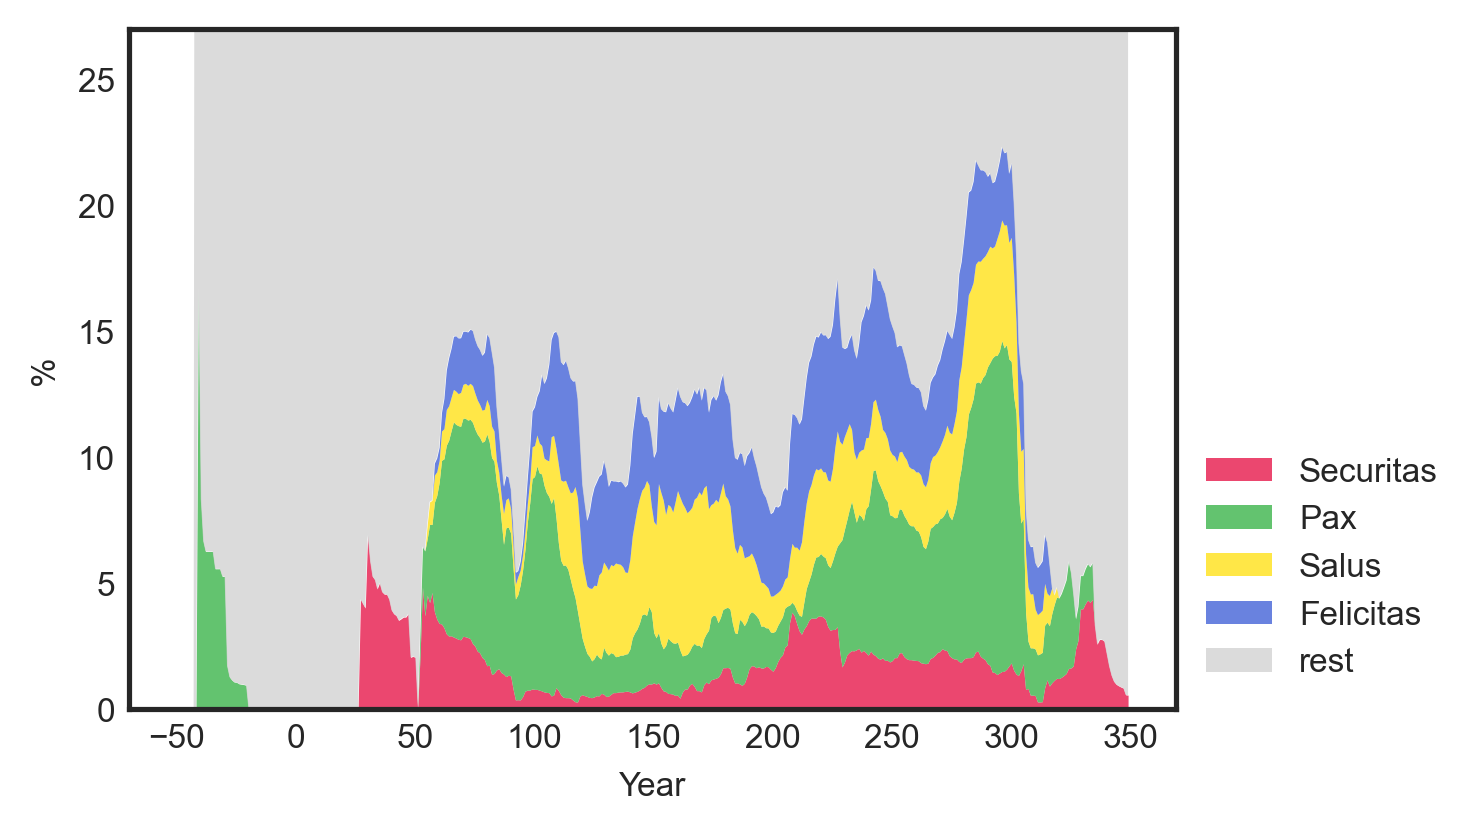

In [50]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df_4bens.index, date_freqs_dict_4bens.values(),
             labels=date_freqs_dict_4bens.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_xlabel('Year')
ax.set_ylabel('%')
ax.set_ylim(0,27)

# coins to dates

In [51]:
start, stop = -50, 350
data = []
for date in range(start, stop):
    date_subset = coins[coins["date_random"]==date]
    date_dict = {}
    date_dict["date"] = date
    #date_dict["coins_n"] = len(date_subset)
    deities_list_flat = [d for l in date_subset["deities"] for d in l]
    #date_dict["deities_n"] = len(deities_list_flat)
    deities_unique = list(set(deities_list_flat))
    #date_dict["deities_unique_N"] = len(deities_unique)
    deities_counts_dict = dict(nltk.FreqDist(deities_list_flat).most_common())
    date_dict.update(deities_counts_dict)
    data.append(date_dict)

In [52]:
deities_by_date_df = pd.DataFrame(data)
deities_by_date_df.fillna(0, inplace=True)  #,inplace=True)
deities_by_date_df.set_index("date", inplace=True)
deities_by_date_df[165:200]

Venus  Victory   Pax  Mars  Jupiter  Aurora  Apollo  Diana  Pegasus  \
date                                                                        
115     0.0      4.0   0.0   3.0      2.0     0.0     0.0    0.0      0.0   
116     0.0      3.0   0.0   1.0      2.0     0.0     0.0    0.0      0.0   
117     0.0     12.0  15.0   1.0      0.0     0.0     0.0    0.0      0.0   
118     0.0      0.0   0.0   0.0      0.0     0.0     0.0    0.0      0.0   
119     0.0      6.0   5.0   0.0      3.0     0.0     0.0    0.0      0.0   
120     0.0     33.0   4.0   5.0      7.0     0.0     0.0    0.0      0.0   
121     0.0     33.0   4.0   2.0      2.0     0.0     0.0    0.0      0.0   
122     0.0     12.0   5.0   0.0      3.0     0.0     0.0    0.0      0.0   
123     0.0     12.0   5.0   0.0      2.0     0.0     0.0    0.0      0.0   
124     0.0      4.0   0.0   0.0      0.0     0.0     0.0    3.0      0.0   
125     0.0      4.0   0.0   1.0      1.0     0.0     0.0    4.0      2.0   
126     0.0      7.0   0.0   0.0      0.0     0.0     0.0    0.0      0.0   
127     0.0     11.0   0.0   0.0      0.0     0.0     0.0    0.0      0.0   
128     0.0      9.0   0.0   2.0      2.0     0.0     0.0    0.0      0.0   
129     1.0      8.0   1.0   3.0      2.0     0.0     0.0    0.0     11.0   
130     2.0      4.0   0.0   0.0      1.0     0.0     0.0    0.0     16.0   
131     1.0      0.0   0.0   2.0      0.0     0.0     0.0    0.0      0.0   
132     0.0      0.0   0.0   1.0      0.0     0.0     0.0    0.0      0.0   
133     2.0      0.0   1.0   2.0      2.0     0.0     0.0    0.0      0.0   
134     1.0      3.0   0.0   0.0      3.0     0.0     0.0    0.0      0.0   
135     0.0      1.0   2.0   0.0      3.0     0.0     0.0    0.0      0.0   
136     1.0     35.0   6.0   0.0      5.0     0.0     0.0    0.0      0.0   
137    11.0      5.0   0.0   0.0      0.0     0.0     0.0    5.0      0.0   
138     5.0      6.0  10.0   0.0      0.0     0.0     0.0   14.0      0.0   
139     1.0      2.0  18.0   0.0      0.0     0.0     0.0    1.0      0.0   
140     2.0      4.0   1.0   1.0      0.0     0.0     0.0    0.0      0.0   
141    11.0      9.0   3.0   3.0      2.0     0.0     1.0    1.0      0.0   
142     0.0      9.0   3.0   2.0      1.0     0.0     2.0    0.0      0.0   
143     0.0     18.0   1.0   2.0      7.0     0.0     2.0    0.0      0.0   
144     0.0     16.0   1.0   2.0      5.0     0.0     1.0    0.0      0.0   
145     3.0      5.0   0.0   0.0      0.0     0.0     0.0    1.0      0.0   
146     8.0      4.0   1.0   0.0      0.0     0.0     0.0    0.0      0.0   
147     3.0      6.0   0.0   0.0      0.0     0.0     1.0    1.0      0.0   
148     6.0      2.0   1.0   1.0      0.0     0.0     0.0    1.0      0.0   
149     1.0      1.0   0.0   1.0      0.0     0.0     1.0    1.0      0.0   

      Pan  Sicilia  Concordia  Securitas  Fortuna  Vesta  Neptune  Constantia  \
date                                                                            
115   0.0      0.0        0.0        0.0      2.0    3.0      0.0         0.0   
116   0.0      0.0        0.0        0.0      4.0    0.0      0.0         0.0   
117   0.0      0.0       48.0        0.0     48.0    0.0      0.0         0.0   
118   0.0      0.0        0.0        0.0      1.0    1.0      0.0         0.0   
119   0.0      0.0        5.0        3.0      4.0    0.0      0.0         0.0   
120   0.0      0.0       11.0        1.0      2.0    0.0      0.0         0.0   
121   0.0      0.0        6.0        0.0      9.0    0.0      0.0         0.0   
122   0.0      0.0        4.0        0.0     11.0    0.0      3.0         0.0   
123   0.0      0.0        2.0        0.0      6.0    0.0      2.0         0.0   
124   0.0      0.0        0.0        0.0      0.0    0.0      0.0         0.0   
125   0.0      0.0        5.0        0.0      0.0    0.0      3.0         0.0   
126   0.0      0.0        0.0        0.0      1.0    0.0     11.0         0.0   
127   0.0      0.0    

<AxesSubplot:xlabel='date'>

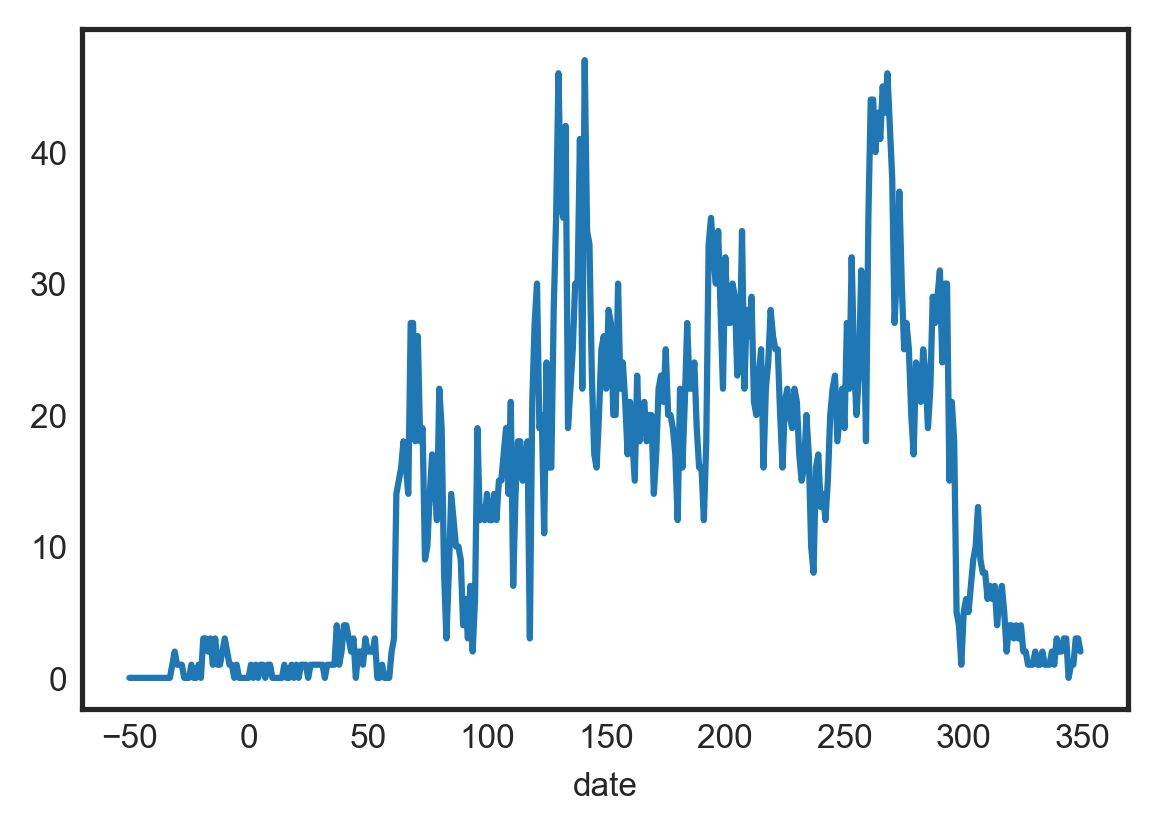

In [53]:
diversity_by_date = (deities_by_date_df > 0).sum(axis=1)
fig, ax = plt.subplots()
diversity_by_date.plot(ax=ax)

In [54]:
save_figure(fig, "diversity_by_date")

<AxesSubplot:xlabel='date'>

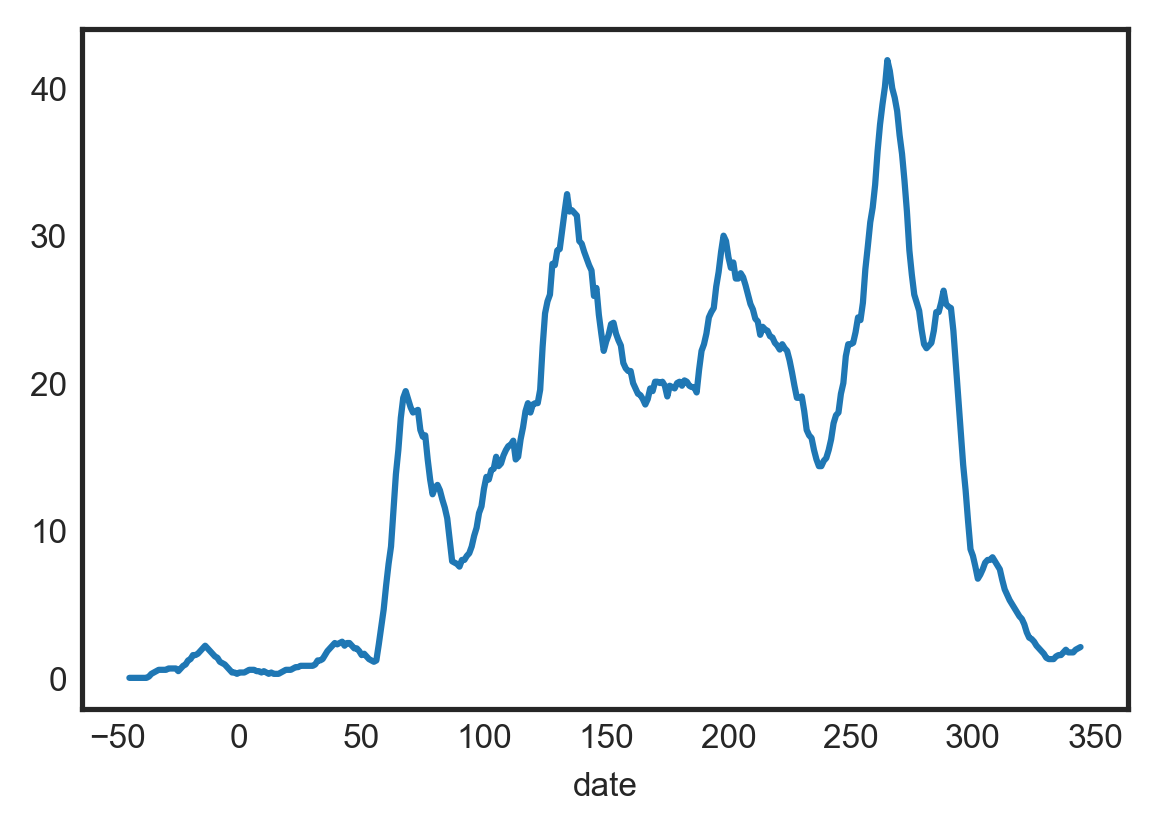

In [55]:
fig, ax = plt.subplots()
diversity_by_date.rolling(11, center=True).mean().plot()

In [56]:
save_figure(fig, "diversity_by_date_rolling11")

In [57]:
deities_by_date_share = deities_by_date_df.divide(deities_by_date_df.sum(axis=1), axis=0)
deities_by_date_share[165:200]

Venus   Victory       Pax      Mars   Jupiter  Aurora    Apollo  \
date                                                                       
115   0.000000  0.117647  0.000000  0.088235  0.058824     0.0  0.000000   
116   0.000000  0.083333  0.000000  0.027778  0.055556     0.0  0.000000   
117   0.000000  0.046512  0.058140  0.003876  0.000000     0.0  0.000000   
118   0.000000  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   
119   0.000000  0.088235  0.073529  0.000000  0.044118     0.0  0.000000   
120   0.000000  0.183333  0.022222  0.027778  0.038889     0.0  0.000000   
121   0.000000  0.173684  0.021053  0.010526  0.010526     0.0  0.000000   
122   0.000000  0.120000  0.050000  0.000000  0.030000     0.0  0.000000   
123   0.000000  0.166667  0.069444  0.000000  0.027778     0.0  0.000000   
124   0.000000  0.129032  0.000000  0.000000  0.000000     0.0  0.000000   
125   0.000000  0.071429  0.000000  0.017857  0.017857     0.0  0.000000   
126   0.000000  0.122807  0.000000  0.000000  0.000000     0.0  0.000000   
127   0.000000  0.220000  0.000000  0.000000  0.000000     0.0  0.000000   
128   0.000000  0.084112  0.000000  0.018692  0.018692     0.0  0.000000   
129   0.003115  0.024922  0.003115  0.009346  0.006231     0.0  0.000000   
130   0.005141  0.010283  0.000000  0.000000  0.002571     0.0  0.000000   
131   0.005291  0.000000  0.000000  0.010582  0.000000     0.0  0.000000   
132   0.000000  0.000000  0.000000  0.005348  0.000000     0.0  0.000000   
133   0.009259  0.000000  0.004630  0.009259  0.009259     0.0  0.000000   
134   0.006623  0.019868  0.000000  0.000000  0.019868     0.0  0.000000   
135   0.000000  0.012987  0.025974  0.000000  0.038961     0.0  0.000000   
136   0.005952  0.208333  0.035714  0.000000  0.029762     0.0  0.000000   
137   0.041199  0.018727  0.000000  0.000000  0.000000     0.0  0.000000   
138   0.019920  0.023904  0.039841  0.000000  0.000000     0.0  0.000000   
139   0.006757  0.013514  0.121622  0.000000  0.000000     0.0  0.000000   
140   0.043478  0.086957  0.021739  0.021739  0.000000     0.0  0.000000   
141   0.030726  0.025140  0.008380  0.008380  0.005587     0.0  0.002793   
142   0.000000  0.120000  0.040000  0.026667  0.013333     0.0  0.026667   
143   0.000000  0.230769  0.012821  0.025641  0.089744     0.0  0.025641   
144   0.000000  0.262295  0.016393  0.032787  0.081967     0.0  0.016393   
145   0.047619  0.079365  0.000000  0.000000  0.000000     0.0  0.000000   
146   0.228571  0.114286  0.028571  0.000000  0.000000     0.0  0.000000   
147   0.068182  0.136364  0.000000  0.000000  0.000000     0.0  0.022727   
148   0.074074  0.024691  0.012346  0.012346  0.000000     0.0  0.000000   
149   0.013699  0.013699  0.000000  0.013699  0.000000     0.0  0.013699   

         Diana   Pegasus       Pan   Sicilia  Concordia  Securitas   Fortuna  \
date                                                                           
115   0.000000  0.000000  0.000000  0.000000   0.000000   0.000000  0.058824   
116   0.000000  0.000000  0.000000  0.000000   0.000000   0.000000  0.111111   
117   0.000000  0.000000  0.000000  0.000000   0.186047   0.000000  0.186047   
118   0.000000  0.000000  0.000000  0.000000   0.000000   0.000000  0.333333   
119   0.000000  0.000000  0.000000  0.000000   0.073529   0.044118  0.058824   
120   0.000000  0.000000  0.000000  0.000000   0.061111   0.005556  0.011111   
121   0.000000  0.000000  0.000000  0.000000   0.031579   0.000000  0.047368   
122   0.000000  0.000000  0.000000  0.000000   0.040000   0.000000  0.110000   
123   0.000000  0.000000  0.000000  0.000000   0.027778   0.000000  0.083333   
124   0.096774  0.000000  0.000000  0.000000   0.000000   0.000000  0.000000   
125   0.071429  0.035714  0.000000  0.000000   0.089286   0.000000  0.000000   
126   0.000000  0.000000  0.000000  0.000000   0.000000   0.000000  0.017544   
127   0.000000  0.000000  0.000000  0.000000   0.000000   0.000000  0.000000

In [58]:
def get_di(shares_vec):
    a = np.array(shares_vec)
    a = a**2
    hh = sum(a) # Hirschman-Herfindahl index
    ihh = 1 / hh # inverse Hirschman-Herfindahl index
    return ihh

In [59]:
deities_by_date_diversity = deities_by_date_share.apply(lambda row: get_di(row), axis=1)
deities_by_date_diversity[165:200]

date
115    12.041667
116     9.000000
117     8.002404
118     3.000000
119    16.055556
120    14.400000
121    13.551051
122    14.164306
123    12.000000
124     9.907216
125    16.860215
126     9.996923
127     8.445946
128    19.113523
129    15.303876
130    22.923951
131    15.770861
132    17.634392
133    25.083871
134     8.692718
135    10.568627
136    10.391753
137     9.910886
138     9.475259
139    20.625235
140    13.740260
141    12.111510
142    21.718147
143    12.570248
144     8.966265
145     8.286013
146     9.210526
147    14.666667
148    12.940828
149    13.289277
dtype: float64

Text(0.5, 0, 'Year')

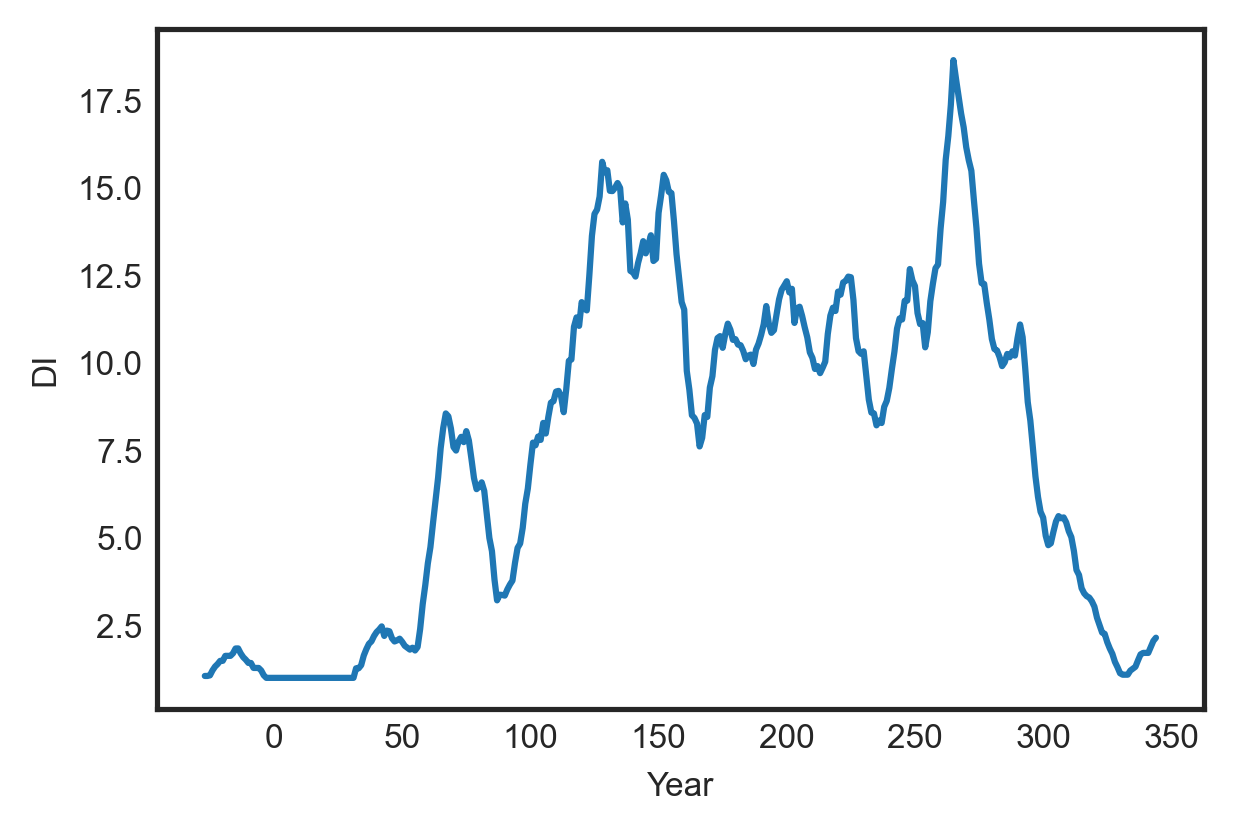

In [140]:
fig, ax = plt.subplots()
deities_by_date_diversity.interpolate().rolling(11, center=True).mean().plot(ax=ax)
ax.set_ylabel("DI")
ax.set_xlabel("Year")

In [141]:
save_figure(fig, "deities_by_date_diversity_rolling11")

In [62]:
pctchange_df = deities_by_date_df.pct_change()
pctchange_df.replace(np.inf, 1, inplace=True)
pctchange_df.fillna(0, inplace=True)
pctchange_df = pctchange_df * 100 #to percentage
pctchange_df[100:140]

Venus     Victory         Pax        Mars     Jupiter  Aurora  \
date                                                                  
50      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
51      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
52      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
53      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
54      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
55      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
56      0.0  100.000000    0.000000    0.000000    0.000000     0.0   
57      0.0 -100.000000    0.000000    0.000000    0.000000     0.0   
58      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
59      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
60      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
61      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
62      0.0  100.000000  100.000000  100.000000    0.000000     0.0   
63      0.0   38.461538  100.000000  100.000000    0.000000     0.0   
64      0.0    5.555556  100.000000  100.000000  100.000000     0.0   
65      0.0   -5.263158  -75.000000  -75.000000    0.000000     0.0   
66      0.0   66.666667  500.000000  500.000000  100.000000     0.0   
67      0.0  -43.333333 -100.000000 -100.000000 -100.000000     0.0   
68      0.0  388.235294  100.000000  100.000000  100.000000     0.0   
69      0.0   37.349398   18.181818  450.000000  100.000000     0.0   
70      0.0  -88.596491  -46.153846  -81.818182 -100.000000     0.0   
71      0.0  684.615385  157.142857  175.000000  100.000000     0.0   
72      0.0  -68.627451  -69.444444  -63.636364    0.000000     0.0   
73      0.0   43.750000  127.272727  -25.000000  200.000000     0.0   
74      0.0  -56.521739  -56.000000 -100.000000  -33.333333     0.0   
75      0.0   50.000000    9.090909    0.000000  -50.000000     0.0   
76      0.0  -76.666667   25.000000    0.000000  400.000000     0.0   
77      0.0  228.571429  -53.333333  100.000000  -80.000000     0.0   
78      0.0  -30.434783    0.000000   66.666667  400.000000     0.0   
79    100.0   31.250000    0.000000  -60.000000 -100.000000     0.0   
80   -100.0   14.285714  171.428571  150.000000  100.000000     0.0   
81    100.0   45.833333  -10.526316  -80.000000 -100.000000     0.0   
82   -100.0  -91.428571  -94.117647    0.000000    0.000000     0.0   
83      0.0 -100.000000 -100.000000 -100.000000    0.000000     0.0   
84      0.0  100.000000    0.000000  100.000000  100.000000     0.0   
85      0.0  300.000000  100.000000  300.000000  200.000000     0.0   
86      0.0  -59.375000 -100.000000  -75.000000  -33.333333     0.0   
87      0.0  -38.461538    0.000000  -50.000000  -66.666667     0.0   
88      0.0   12.500000    0.000000 -100.000000    0.000000     0.0   
89      0.0  -88.888889  100.000000    0.000000  -50.000000     0.0   

          Apollo  Diana  Pegasus  Pan  Sicilia   Concordia    Securitas  \
date                                                                      
50      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
51      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
52      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
53      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
54      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
55      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
56      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
57      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
58      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
59      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
60      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
61      0.000000    0.0      0.0  0.0      0.0  

In [63]:
pctchange_df = pctchange_df.abs()
pctchange_df[100:140]

Venus     Victory         Pax        Mars     Jupiter  Aurora  \
date                                                                  
50      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
51      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
52      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
53      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
54      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
55      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
56      0.0  100.000000    0.000000    0.000000    0.000000     0.0   
57      0.0  100.000000    0.000000    0.000000    0.000000     0.0   
58      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
59      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
60      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
61      0.0    0.000000    0.000000    0.000000    0.000000     0.0   
62      0.0  100.000000  100.000000  100.000000    0.000000     0.0   
63      0.0   38.461538  100.000000  100.000000    0.000000     0.0   
64      0.0    5.555556  100.000000  100.000000  100.000000     0.0   
65      0.0    5.263158   75.000000   75.000000    0.000000     0.0   
66      0.0   66.666667  500.000000  500.000000  100.000000     0.0   
67      0.0   43.333333  100.000000  100.000000  100.000000     0.0   
68      0.0  388.235294  100.000000  100.000000  100.000000     0.0   
69      0.0   37.349398   18.181818  450.000000  100.000000     0.0   
70      0.0   88.596491   46.153846   81.818182  100.000000     0.0   
71      0.0  684.615385  157.142857  175.000000  100.000000     0.0   
72      0.0   68.627451   69.444444   63.636364    0.000000     0.0   
73      0.0   43.750000  127.272727   25.000000  200.000000     0.0   
74      0.0   56.521739   56.000000  100.000000   33.333333     0.0   
75      0.0   50.000000    9.090909    0.000000   50.000000     0.0   
76      0.0   76.666667   25.000000    0.000000  400.000000     0.0   
77      0.0  228.571429   53.333333  100.000000   80.000000     0.0   
78      0.0   30.434783    0.000000   66.666667  400.000000     0.0   
79    100.0   31.250000    0.000000   60.000000  100.000000     0.0   
80    100.0   14.285714  171.428571  150.000000  100.000000     0.0   
81    100.0   45.833333   10.526316   80.000000  100.000000     0.0   
82    100.0   91.428571   94.117647    0.000000    0.000000     0.0   
83      0.0  100.000000  100.000000  100.000000    0.000000     0.0   
84      0.0  100.000000    0.000000  100.000000  100.000000     0.0   
85      0.0  300.000000  100.000000  300.000000  200.000000     0.0   
86      0.0   59.375000  100.000000   75.000000   33.333333     0.0   
87      0.0   38.461538    0.000000   50.000000   66.666667     0.0   
88      0.0   12.500000    0.000000  100.000000    0.000000     0.0   
89      0.0   88.888889  100.000000    0.000000   50.000000     0.0   

          Apollo  Diana  Pegasus  Pan  Sicilia   Concordia    Securitas  \
date                                                                      
50      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
51      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
52      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
53      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
54      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
55      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
56      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
57      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
58      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
59      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
60      0.000000    0.0      0.0  0.0      0.0    0.000000     0.000000   
61      0.000000    0.0      0.0  0.0      0.0  

In [64]:
pctchange_df["mean_change"] = pctchange_df.mean(axis=1)
pctchange_df["mean_change"][165:200]

date
115    10.130612
116    11.304762
117    35.200000
118    10.273810
119    14.857143
120    26.490476
121    14.948196
122    15.683818
123     5.747186
124    14.452381
125    10.761905
126    16.000000
127     9.743476
128    26.935642
129    59.044444
130    29.290733
131    31.625807
132    17.327591
133    29.890975
134    25.522367
135    12.550726
136    52.246032
137    65.004082
138    17.818519
139    26.303278
140    24.800907
141    43.452381
142    19.023077
143    20.714286
144    17.798186
145    18.392857
146    10.942857
147    10.500000
148    25.676190
149    14.157287
Name: mean_change, dtype: float64

Text(0, 0.5, 'avg. pct. change')

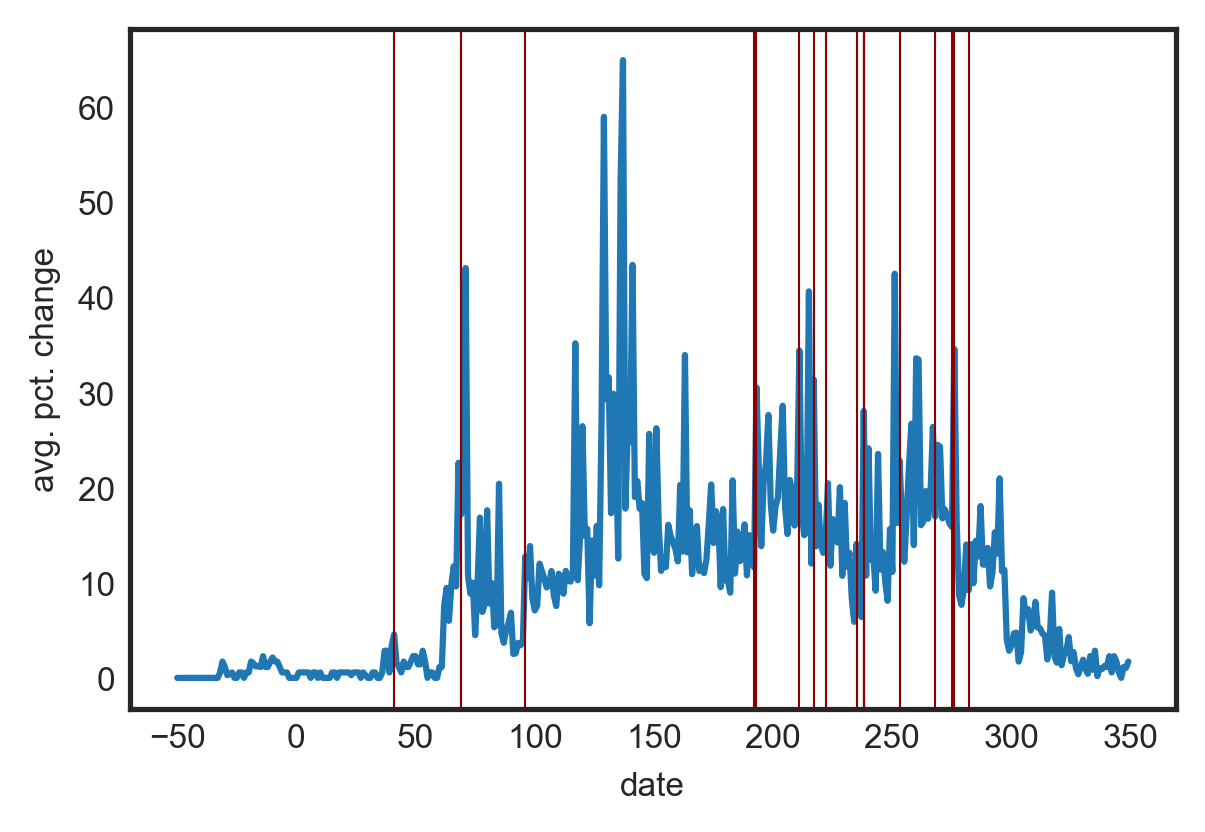

In [65]:
fig, ax = plt.subplots()

pctchange_df["mean_change"].plot(ax=ax)
for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)
ax.set_ylabel("avg. pct. change")

In [66]:
pctchange_df["sum_change"] = pctchange_df.sum(axis=1)
pctchange_df["sum_change"][100:140]

date
50     402.285714
51     251.428571
52     251.428571
53     502.857143
54     301.714286
55       0.000000
56     100.571429
57     100.571429
58       0.000000
59       0.000000
60     201.142857
61     201.142857
62    1340.952381
63    1664.586081
64    1056.798186
65    1724.905024
66    2065.785034
67    1693.081319
68    3983.368067
69    3023.860004
70    3118.270607
71    7590.034956
72    1884.726022
73    1558.768254
74    1762.652249
75     791.314286
76    1761.676190
77    2967.814966
78    1221.883072
79    1360.901587
80    3104.473790
81    1379.316892
82    1756.752255
83     936.902256
84     990.241758
85    3595.428571
86     826.212245
87     649.293564
88     890.476190
89    1011.985747
Name: sum_change, dtype: float64

Text(0, 0.5, 'sum pct. change')

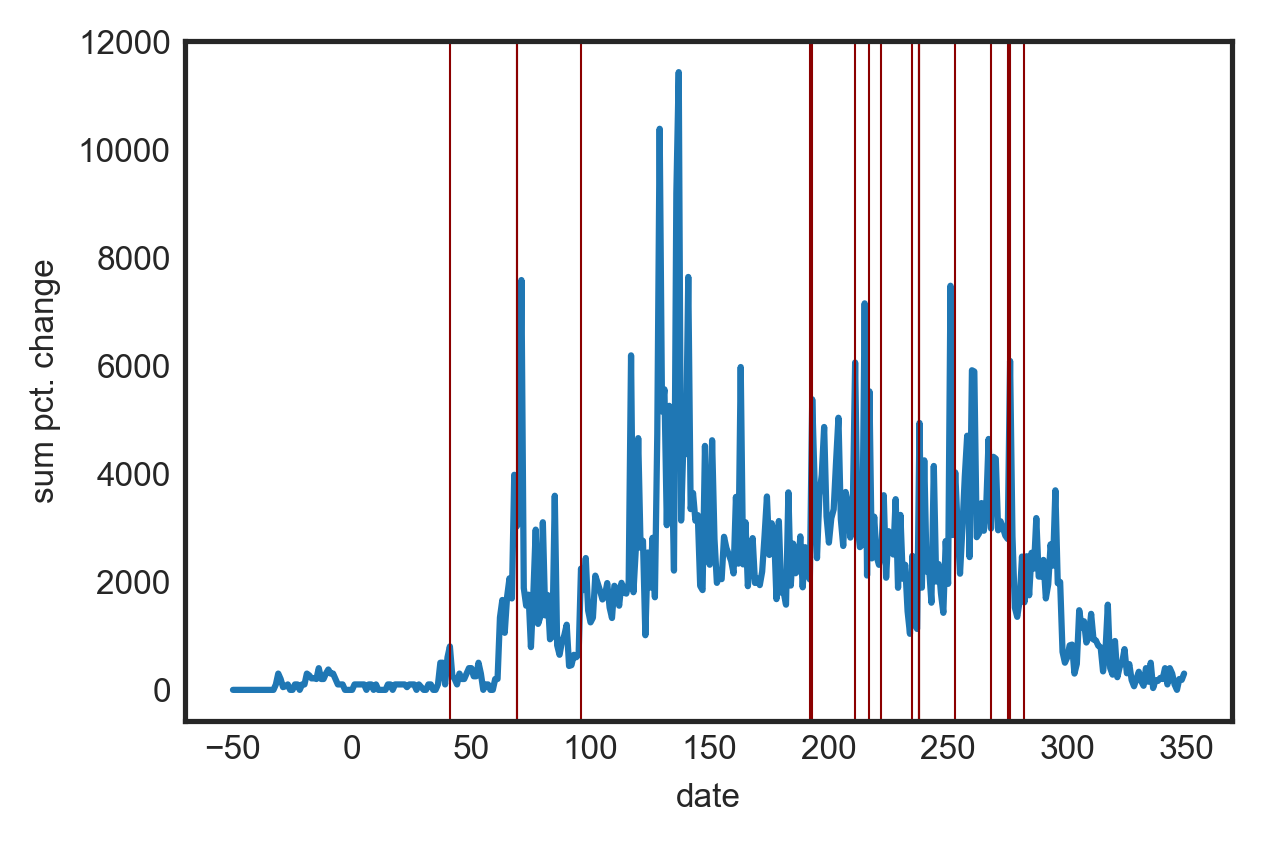

In [67]:
fig, ax = plt.subplots()

pctchange_df["sum_change"].plot(ax=ax)
for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)
ax.set_ylabel("sum pct. change")

# PNAS - lead pollution

In [68]:
pnas = pd.read_excel("../data/pnas.xlsx", sheet_name="Fig. 2", header=None)
pnas.head(10)

0     1  \
0  Please reference the following when using thes...   NaN   
1  McConnell, J.R., A.I. Wilson, A. Stohl, M.M. A...   NaN   
2   Lead pollution recorded in Greenland ice indi...   NaN   
3   Proc Natl Acad Sci U.S.A., doi: 10.1073/pnas....   NaN   
4                                                NaN   NaN   
5                                        Year Before  Lead   
6                                               1950  pg/g   
7                                             3185.5  2.86   
8                                             3184.5  3.86   
9                                             3183.5  2.24   

                       2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6  Missing values -0.999  
7                    NaN  
8                    NaN  
9                    NaN

In [69]:
pnas = pnas[7:].copy()
pnas["date"] = pnas[0].apply(lambda x: 1950.5 - x)
def clean_pol(pol):
    if pol == -0.999:
        pol = np.nan
    return pol
pnas["pollution"] = pnas[1].apply(clean_pol)
pnas.head(5)

0     1    2    date  pollution
7   3185.5  2.86  NaN -1235.0       2.86
8   3184.5  3.86  NaN -1234.0       3.86
9   3183.5  2.24  NaN -1233.0       2.24
10  3182.5  1.79  NaN -1232.0       1.79
11  3181.5  1.44  NaN -1231.0       1.44

In [70]:
#pnas.set_index("date", inplace=True)
pnas[100:120]

0      1    2    date  pollution
107  3085.5   3.22  NaN -1135.0       3.22
108  3084.5   2.23  NaN -1134.0       2.23
109  3083.5   2.79  NaN -1133.0       2.79
110  3082.5   1.46  NaN -1132.0       1.46
111  3081.5   2.09  NaN -1131.0       2.09
112  3080.5 -0.999  NaN -1130.0        NaN
113  3079.5   1.09  NaN -1129.0       1.09
114  3078.5   1.27  NaN -1128.0       1.27
115  3077.5   1.99  NaN -1127.0       1.99
116  3076.5   1.49  NaN -1126.0       1.49
117  3075.5   1.86  NaN -1125.0       1.86
118  3074.5   3.77  NaN -1124.0       3.77
119  3073.5   2.88  NaN -1123.0       2.88
120  3072.5   3.79  NaN -1122.0       3.79
121  3071.5   3.74  NaN -1121.0       3.74
122  3070.5   2.27  NaN -1120.0       2.27
123  3069.5   1.98  NaN -1119.0       1.98
124  3068.5   1.47  NaN -1118.0       1.47
125  3067.5   1.33  NaN -1117.0       1.33
126  3066.5   1.22  NaN -1116.0       1.22

In [71]:
pnas['pollution'].interpolate().rolling(11, center=True).mean()

7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
        ..
2039   NaN
2040   NaN
2041   NaN
2042   NaN
2043   NaN
Name: pollution, Length: 2037, dtype: float64

(-50.0, 350.0)

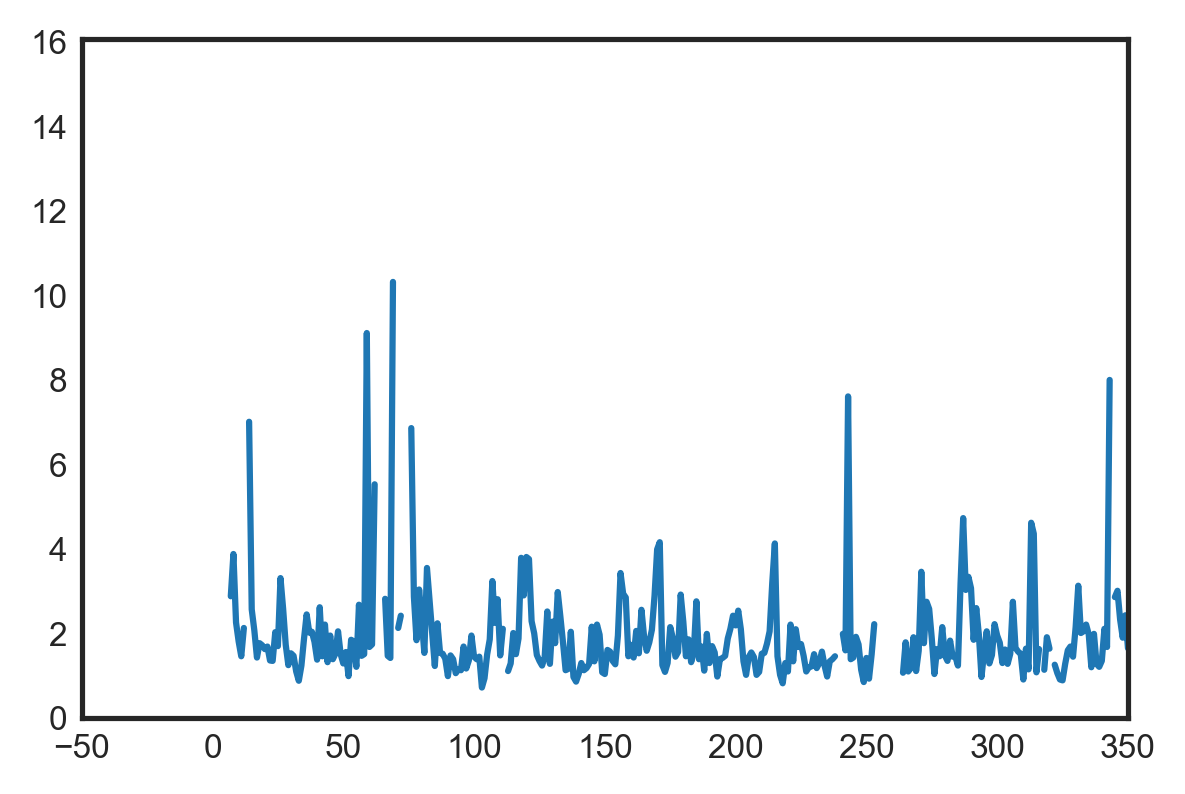

In [72]:
fig,ax = plt.subplots()
ax.plot(pnas["pollution"])
ax.set_xlim(-50,350)

(-50.0, 350.0)

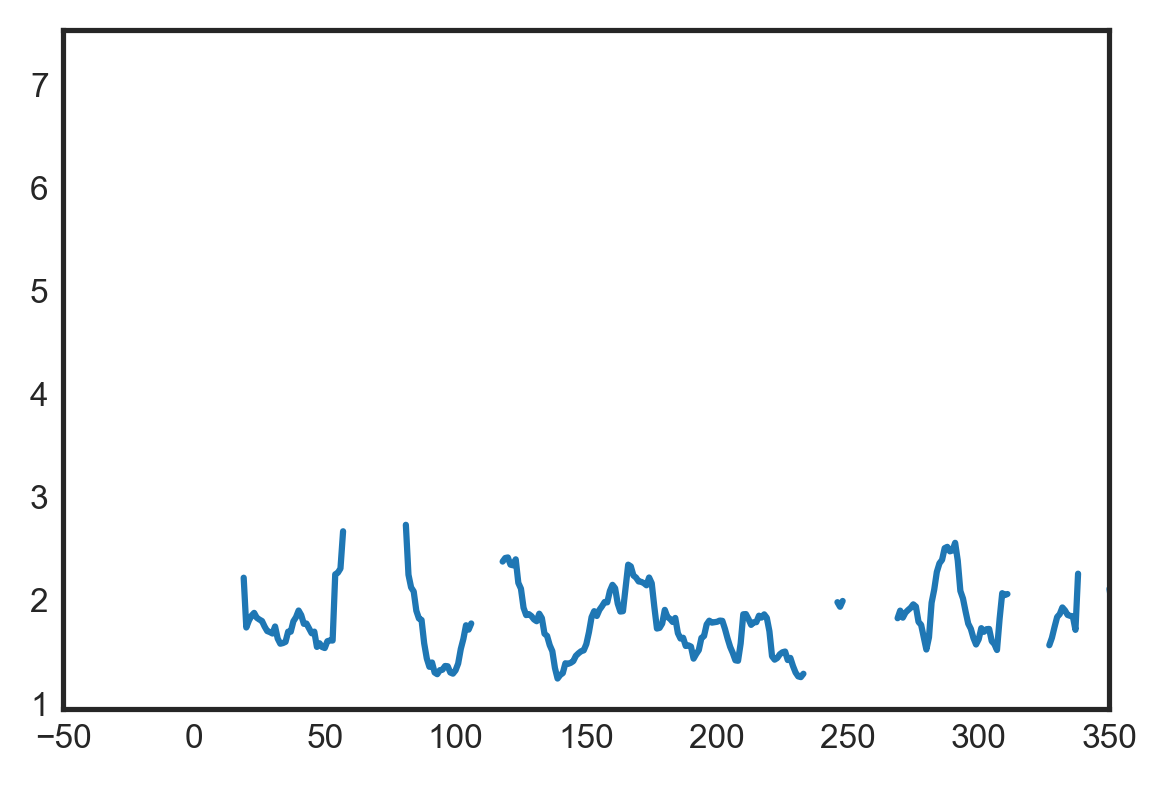

In [73]:
fig,ax = plt.subplots()
ax.plot(pnas["pollution"].rolling(11, center=True).mean())
ax.set_xlim(-50,350)

In [74]:
pnas['pollution_interpol'] = pnas['pollution'].interpolate()

(-50.0, 350.0)

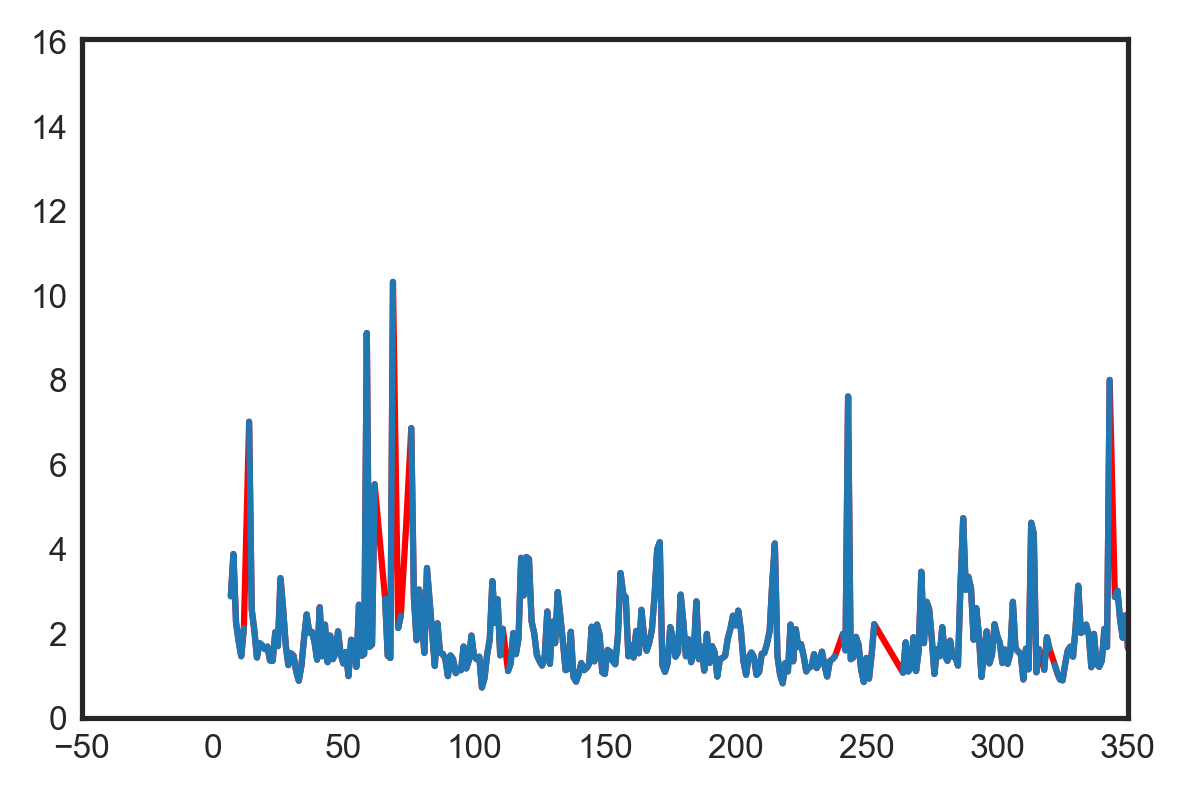

In [75]:
fig, ax = plt.subplots()
ax.plot(pnas["pollution_interpol"], color="red")
ax.plot(pnas["pollution"])
ax.set_xlim(-50, 350)

(-50.0, 350.0)

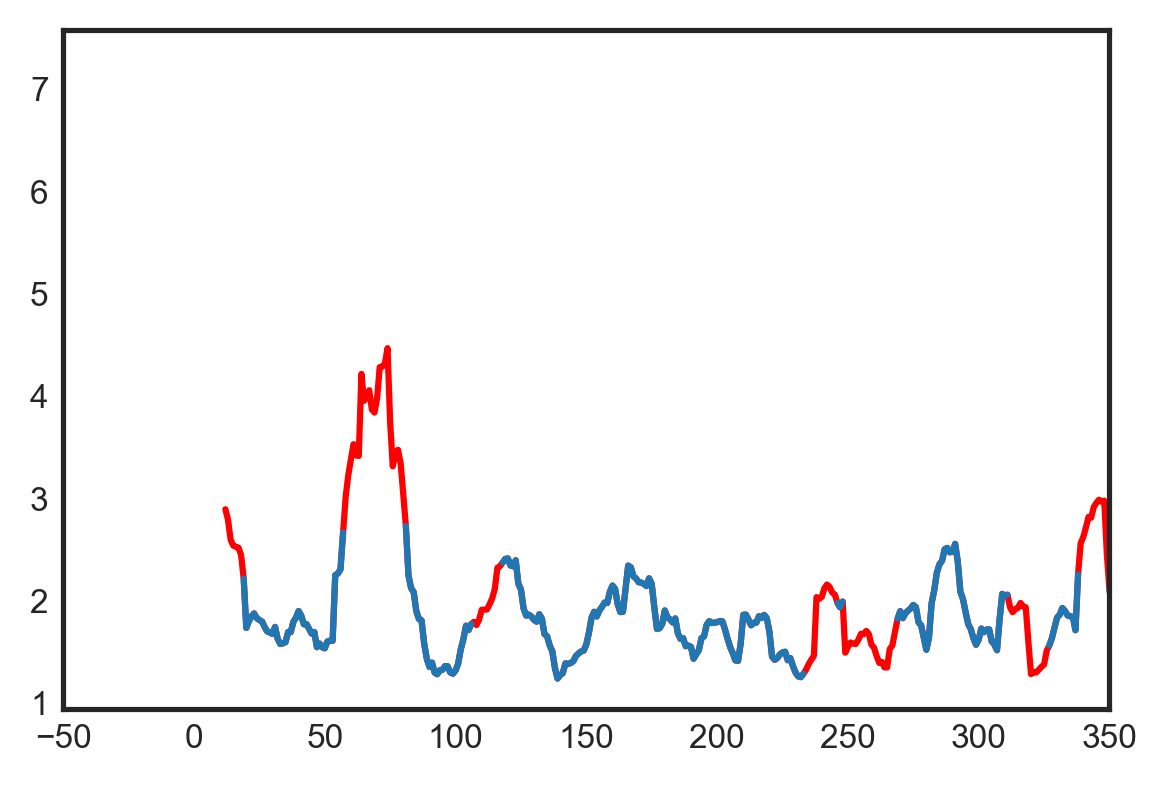

In [76]:
fig, ax = plt.subplots()
ax.plot(pnas["pollution_interpol"].rolling(11, center=True).mean(), color="red")
ax.plot(pnas["pollution"].rolling(11, center=True).mean())
ax.set_xlim(-50, 350)

#   Returning back to deities

In [130]:
date_freqs_df

Victory  Pax  Mars  Jupiter  Concordia  Securitas  Fortuna  Minerva  \
date                                                                        
-50      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-49      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-48      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-47      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-46      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
...       ...  ...   ...      ...        ...        ...      ...      ...   
 345    36.25  0.0  0.91      0.0        0.0       0.91      0.0      0.0   
 346    31.32  0.0  0.86      0.0        0.0       0.86      0.0      0.0   
 347    27.75  0.0  0.82      0.0        0.0       0.82      0.0      0.0   
 348    23.84  0.0  0.82      0.0        0.0       0.55      0.0      0.0   
 349    22.28  0.0  0.82      0.0        0.0       0.54      0.0      0.0   

      Spes   Roma  Liberalitas  Genius  Salus  Aequitas  Felicitas  Fides  \
date                                                                        
-50    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-49    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-48    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-47    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-46    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
...    ...    ...          ...     ...    ...       ...        ...    ...   
 345   0.0  23.26          0.0     0.0    0.0       0.0        0.0    0.0   
 346   0.0  26.15          0.0     0.0    0.0       0.0        0.0    0.0   
 347   0.0  28.30          0.0     0.0    0.0       0.0        0.0    0.0   
 348   0.0  30.41          0.0     0.0    0.0       0.0        0.0    0.0   
 349   0.0  31.25          0.0     0.0    0.0       0.0        0.0    0.0   

      Pietas  Hercules  Providentia  Sol   rest  
date                                             
-50      0.0       0.0          0.0  0.0   0.00  
-49      0.0       0.0          0.0  0.0   0.00  
-48      0.0       0.0          0.0  0.0   0.00  
-47      0.0       0.0          0.0  0.0   0.00  
-46      0.0       0.0          0.0  0.0   0.00  
...      ...       ...          ...  ...    ...  
 345     0.0       0.0          0.0  0.0  38.67  
 346     0.0       0.0          0.0  0.0  40.80  
 347     0.0       0.0          0.0  0.0  42.31  
 348     0.0       0.0          0.0  0.0  44.38  
 349     0.0       0.0          0.0  0.0  45.11  

[400 rows x 21 columns]

In [131]:
deities_top20

['Victory',
 'Jupiter',
 'Pax',
 'Mars',
 'Roma',
 'Fortuna',
 'Felicitas',
 'Providentia',
 'Concordia',
 'Salus',
 'Minerva',
 'Sol',
 'Liberalitas',
 'Aequitas',
 'Spes',
 'Hercules',
 'Pietas',
 'Fides',
 'Genius',
 'Securitas']

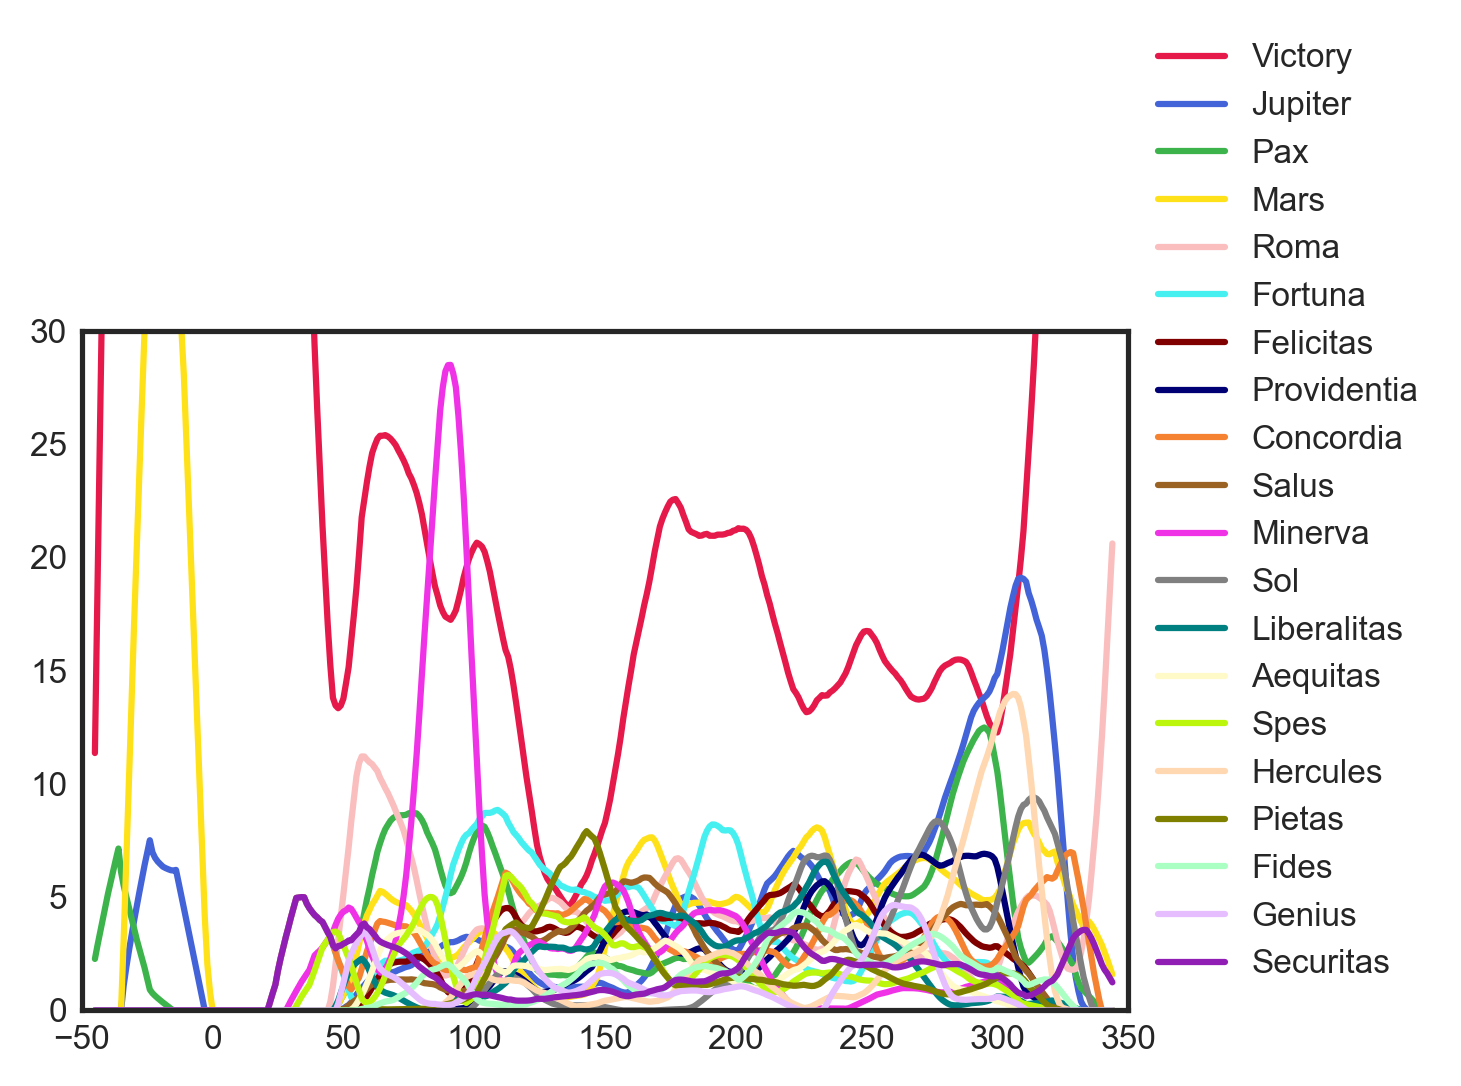

In [135]:
fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity in deities_top20:
    ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=deities_color_dict[deity], label=deity)
ax.set_xlim(-50, 350)
ax.set_ylim(0,30)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

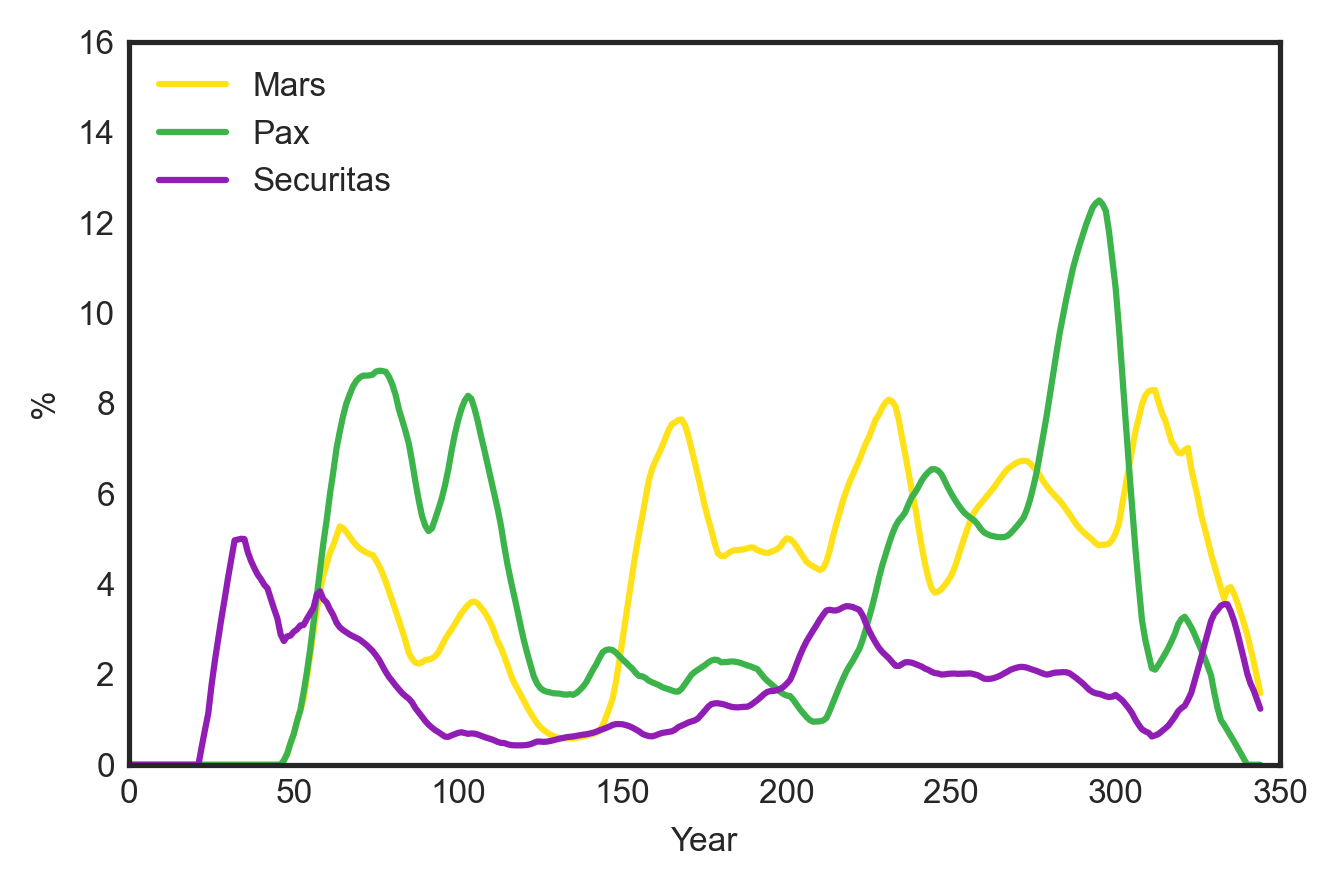

In [138]:
fig, ax = plt.subplots(tight_layout=True)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity in ["Mars", "Pax", "Securitas"]:
    ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=deities_color_dict[deity], label=deity)
ax.set_xlim(0, 350)
ax.set_ylim(0,16)
ax.set_ylabel("%")
ax.set_xlabel("Year")
ax.legend(loc="upper left", bbox_to_anchor=(0,1))

In [139]:
save_figure(fig, "freqs_war_defence")

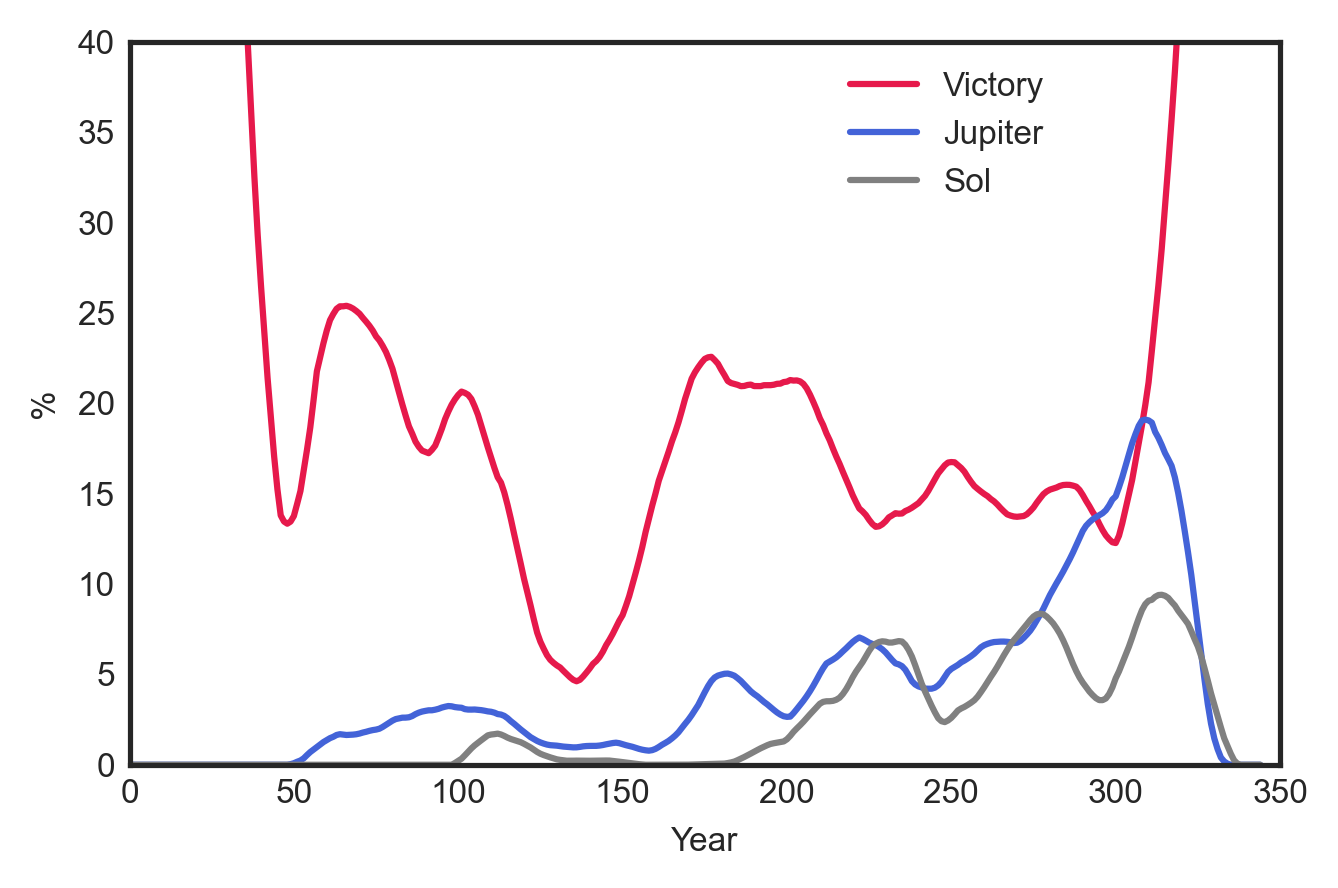

In [145]:
fig, ax = plt.subplots(tight_layout=True)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity in ["Victory", "Jupiter", "Sol"]:
    ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=deities_color_dict[deity], label=deity)
ax.set_xlim(0, 350)
ax.set_ylim(0,40)
ax.set_ylabel("%")
ax.set_xlabel("Year")
ax.legend(loc="upper left", bbox_to_anchor=(0.6,1))

In [146]:
save_figure(fig, "freqs_power_dominance")

In [147]:

date_freqs_df

Victory  Pax  Mars  Jupiter  Concordia  Securitas  Fortuna  Minerva  \
date                                                                        
-50      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-49      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-48      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-47      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-46      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
...       ...  ...   ...      ...        ...        ...      ...      ...   
 345    36.25  0.0  0.91      0.0        0.0       0.91      0.0      0.0   
 346    31.32  0.0  0.86      0.0        0.0       0.86      0.0      0.0   
 347    27.75  0.0  0.82      0.0        0.0       0.82      0.0      0.0   
 348    23.84  0.0  0.82      0.0        0.0       0.55      0.0      0.0   
 349    22.28  0.0  0.82      0.0        0.0       0.54      0.0      0.0   

      Spes   Roma  Liberalitas  Genius  Salus  Aequitas  Felicitas  Fides  \
date                                                                        
-50    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-49    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-48    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-47    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
-46    0.0   0.00          0.0     0.0    0.0       0.0        0.0    0.0   
...    ...    ...          ...     ...    ...       ...        ...    ...   
 345   0.0  23.26          0.0     0.0    0.0       0.0        0.0    0.0   
 346   0.0  26.15          0.0     0.0    0.0       0.0        0.0    0.0   
 347   0.0  28.30          0.0     0.0    0.0       0.0        0.0    0.0   
 348   0.0  30.41          0.0     0.0    0.0       0.0        0.0    0.0   
 349   0.0  31.25          0.0     0.0    0.0       0.0        0.0    0.0   

      Pietas  Hercules  Providentia  Sol   rest  
date                                             
-50      0.0       0.0          0.0  0.0   0.00  
-49      0.0       0.0          0.0  0.0   0.00  
-48      0.0       0.0          0.0  0.0   0.00  
-47      0.0       0.0          0.0  0.0   0.00  
-46      0.0       0.0          0.0  0.0   0.00  
...      ...       ...          ...  ...    ...  
 345     0.0       0.0          0.0  0.0  38.67  
 346     0.0       0.0          0.0  0.0  40.80  
 347     0.0       0.0          0.0  0.0  42.31  
 348     0.0       0.0          0.0  0.0  44.38  
 349     0.0       0.0          0.0  0.0  45.11  

[400 rows x 21 columns]

In [148]:
start, stop = -50, 350
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date - diff, date + diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        #deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts = nltk.FreqDist(deities_list_flat).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        #deities_counts.append(("rest", deities_count - len(deities_list_flat_top20)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n": deities_count,
                     "counts": deities_counts,
                     "freqs_pct": deities_freqs_pct}
    else:
        year_data = {"date": date,
                     "n": 0,
                     "counts": [],
                     "freqs_pct": []}
    print(year_data)
    data.append(year_data)

{'date': -50, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -49, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -48, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -47, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -46, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -45, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -44, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -43, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -42, 'n': 2, 'counts': [('Venus', 2)], 'freqs_pct': [('Venus', 100.0)]}
{'date': -41, 'n': 6, 'counts': [('Victory', 3), ('Venus', 2), ('Pax', 1)], 'freqs_pct': [('Victory', 50.0), ('Venus', 33.33), ('Pax', 16.67)]}
{'date': -40, 'n': 12, 'counts': [('Victory', 9), ('Venus', 2), ('Pax', 1)], 'freqs_pct': [('Victory', 75.0), ('Venus', 16.67), ('Pax', 8.33)]}
{'date': -39, 'n': 15, 'counts': [('Victory', 12), ('Venus', 2), ('Pax', 1)], 'freqs_pct': [('Victory', 80.0), ('Venus', 13.33), ('Pax', 6.67)]}
{'date': -38, 'n': 16, 'counts': [('Victory', 13), ('Venus', 2

In [150]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])] + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)
#date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col != "rest"] + ["rest"]]
date_freqs_df.fillna(0, inplace=True)  #,inplace=True)
date_freqs_dict = date_freqs_df.to_dict("list")  # ["column_dtypes]

In [152]:
date_freqs_df[170:190]

Venus  Victory   Pax  Mars  Jupiter  Aurora  Apollo  Diana  Pegasus  \
date                                                                        
120    0.19     9.18  2.24  1.21     1.54     0.0    0.00   0.33     1.35   
121    0.17     8.29  1.96  1.09     1.40     0.0    0.00   0.31     1.26   
122    0.16     7.39  1.71  1.06     1.30     0.0    0.00   0.28     1.18   
123    0.23     6.58  1.63  1.06     1.17     0.0    0.00   0.26     1.10   
124    0.26     6.27  1.46  0.91     1.20     0.0    0.00   0.26     1.06   
125    0.25     5.99  1.52  0.83     1.26     0.0    0.00   0.25     1.05   
126    0.28     6.78  1.65  0.69     1.31     0.0    0.00   0.24     1.00   
127    0.61     6.34  1.53  0.61     1.15     0.0    0.00   0.38     0.92   
128    0.77     6.17  1.37  0.58     1.15     0.0    0.00   0.83     0.93   
129    0.76     5.95  1.86  0.55     1.10     0.0    0.00   0.82     0.89   
130    0.83     5.93  1.75  0.58     1.01     0.0    0.00   0.83     0.89   
131    1.11     4.93  1.63  0.50     0.82     0.0    0.03   0.82     0.85   
132    1.15     4.37  1.66  0.51     0.81     0.0    0.09   0.84     0.87   
133    1.15     4.58  1.55  0.58     0.94     0.0    0.15   0.85     0.88   
134    1.16     4.72  1.43  0.64     1.04     0.0    0.18   0.85     0.88   
135    1.24     4.71  1.42  0.63     1.03     0.0    0.18   0.78     0.87   
136    1.49     4.74  1.46  0.61     1.00     0.0    0.18   0.67     0.82   
137    1.58     4.72  1.46  0.61     1.01     0.0    0.21   0.70     0.82   
138    1.75     4.41  1.48  0.63     1.00     0.0    0.21   0.72     0.82   
139    1.80     4.21  1.49  0.61     0.95     0.0    0.24   0.76     0.82   

       Pan  Sicilia  Concordia  Securitas  Fortuna  Vesta  Neptune  \
date                                                                 
120   0.00     0.00       4.43       0.56     7.22   0.98     1.35   
121   0.00     0.13       4.27       0.52     6.89   0.87     1.26   
122   0.00     0.28       4.14       0.49     6.46   0.73     1.18   
123   0.00     0.34       4.20       0.45     6.28   0.76     1.10   
124   0.00     0.33       4.34       0.44     6.89   0.98     1.06   
125   0.00     0.32       4.33       0.47     6.78   1.01     1.05   
126   0.03     0.31       4.20       0.52     6.54   0.86     1.00   
127   0.03     0.29       5.10       0.51     6.79   0.83     0.92   
128   0.03     0.29       4.22       0.61     5.59   0.93     0.93   
129   0.03     0.37       4.27       0.58     5.74   0.95     0.89   
130   0.03     0.37       4.40       0.49     5.72   1.05     0.89   
131   0.03     0.35       4.11       0.50     5.80   1.92     0.85   
132   0.03     0.36       4.10       0.57     5.73   1.99     0.87   
133   0.03     0.36       4.10       0.64     5.49   2.00     0.79   
134   0.03     0.37       4.05       0.64     5.33   2.01     0.73   
135   0.03     0.36       4.31       0.66     5.28   1.99     0.72   
136   0.03     0.36       4.22       0.67     5.34   2.00     0.64   
137   0.03     0.37       4.30       0.67     5.33   2.01     0.30   
138   0.03     0.36       4.29       0.69     5.31   1.99     0.21   
139   0.03     0.37       4.30       0.70     5.13   1.92     0.21   

      Constantia  Nemesis  Minerva  Spes  Ceres  Libertas  Roma  Virtus  \
date                                                                      
120          0.0     0.09     3.54  4.66   0.93      1.63  4.19    2.24   
121          0.0     0.09     3.40  4.32   0.83      1.53  3.92    2.01   
122          0.0     0.08     3.17  4.18   0.77      1.42  3.66    1.83   
123          0.0     0.08     2.95  4.24   0.72      1.32  3.82    1.66   
124          0.0     0.07     2.88  4.08   0.69      1.28  4.55    1.57   
125          0.0     0.07     2.85  4.04   0.69      1.23  5.05    1.52   
126          0.0     0.38     2.92  3.99   0.65      1.17  5.16    1.41   
127          0.0     0.35     2.74  5.26   0.64      1.12  5.04    1.28   
128          0.0    

In [153]:
deities_moralizing = ["Salus", "Concordia", "Justitia", "Pietas", "Pudicitia", "Clementia", "Aeternitas", "Liberalitas", "Indulgentia"]

Text(0, 0.5, '%')

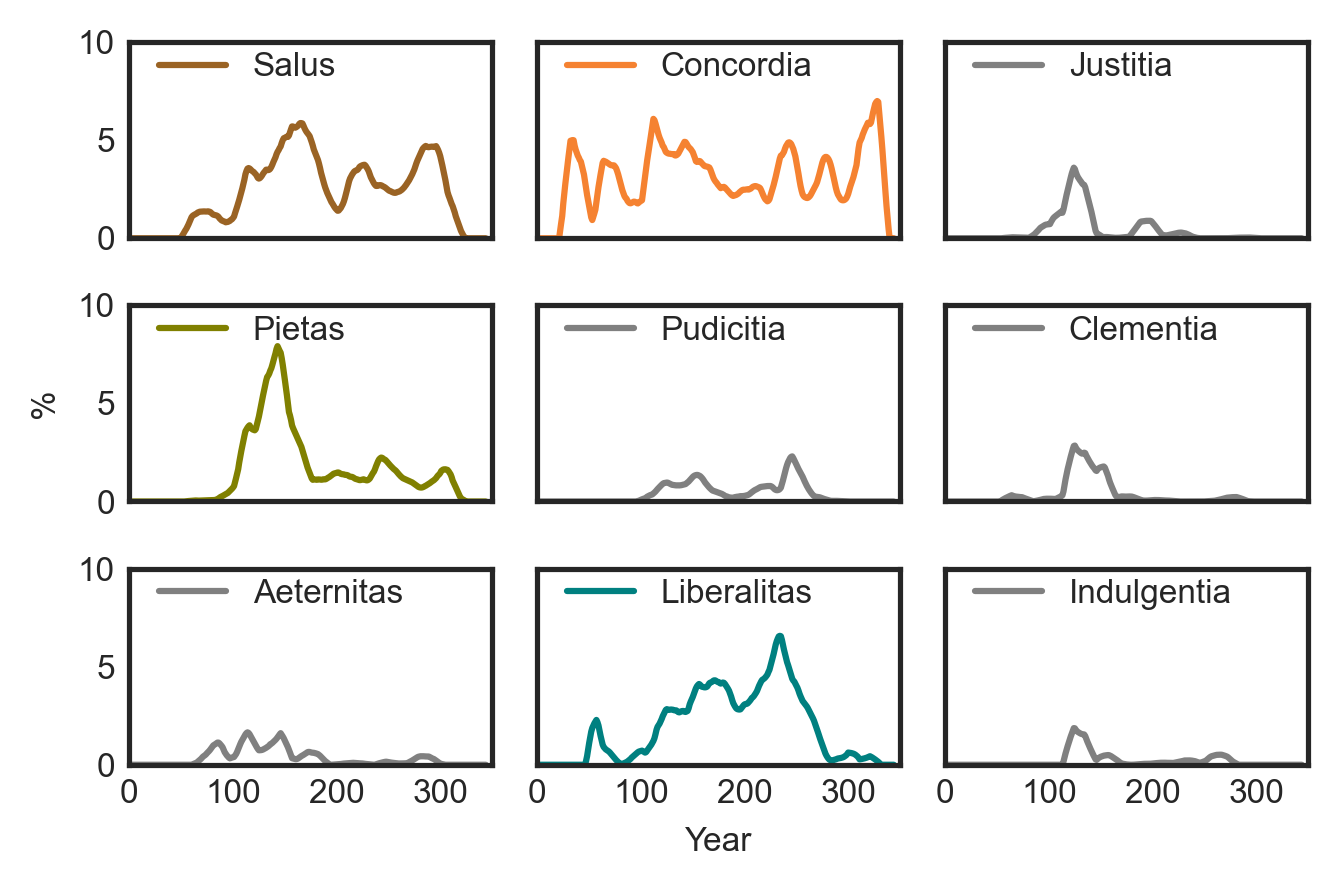

In [173]:
fig, axs = plt.subplots(3,3, tight_layout=True)
for deity, ax in zip (deities_moralizing, axs.ravel()):
    try:
        ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=deities_color_dict[deity], label=deity)
    except:
        ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color="grey", label=deity)
    ax.set_ylim(0,10)
    ax.set_xlim(0,350)
    ax.set_xlim(0, 350)
    ax.legend(loc="upper left", bbox_to_anchor=(0,1.1))
    ax.set_xticks([0,100,200,300])
for n in range(3):
    axs[n,1].set_yticklabels([])
    axs[n,2].set_yticklabels([])
    axs[0, n].set_xticklabels([])
    axs[1, n].set_xticklabels([])

axs[2,1].set_xlabel("Year")
axs[1,0].set_ylabel("%")

#ax.set_ylabel("%")
#ax.set_xlabel("Year")


In [174]:
save_figure(fig, "freqs_deities_moralizing")

In [82]:
def check_deity(deities_list, deity):
    if deity in deities_list:
        return True
    else:
        return False

<AxesSubplot:xlabel='date_random', ylabel='Density'>

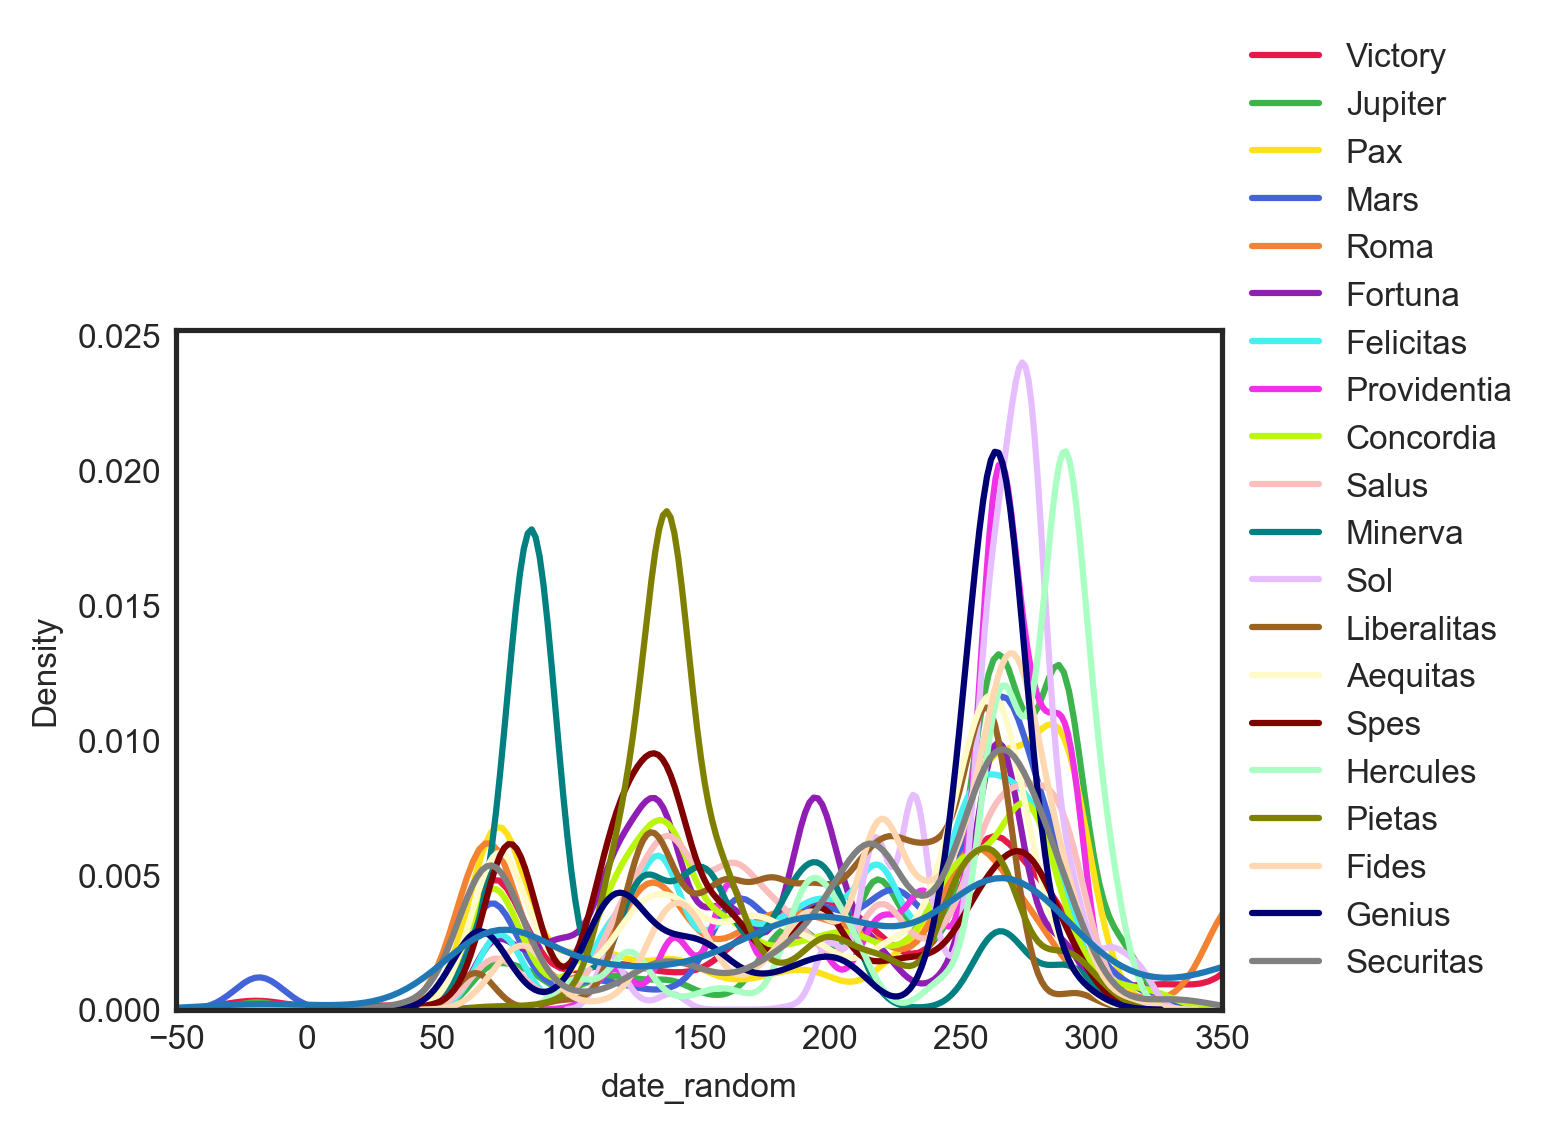

In [83]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_top20, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5)
ax.set_xlim(-50, 350)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, "Victory"))]["date_random"])

In [84]:
deities_select = ["Mars", "Pax", "Securitas", "Aequitas", "Felicitas", "Salus", "Fortuna", "Spes", "Pietas"]

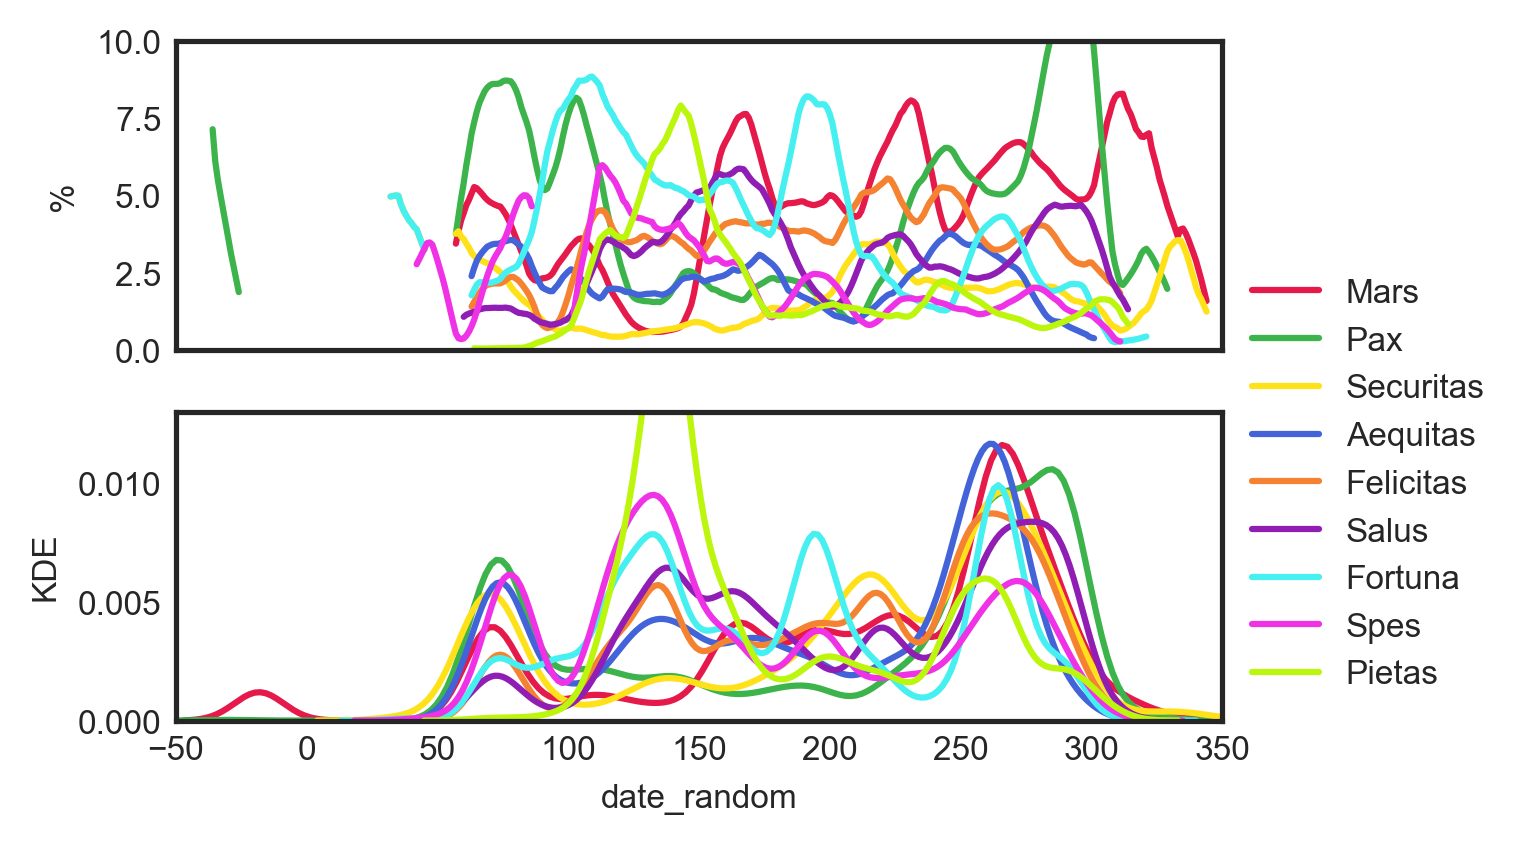

In [85]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(-50, 350)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(-50, 350)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

In [86]:
#task: coins_by_date

# Wars and battles

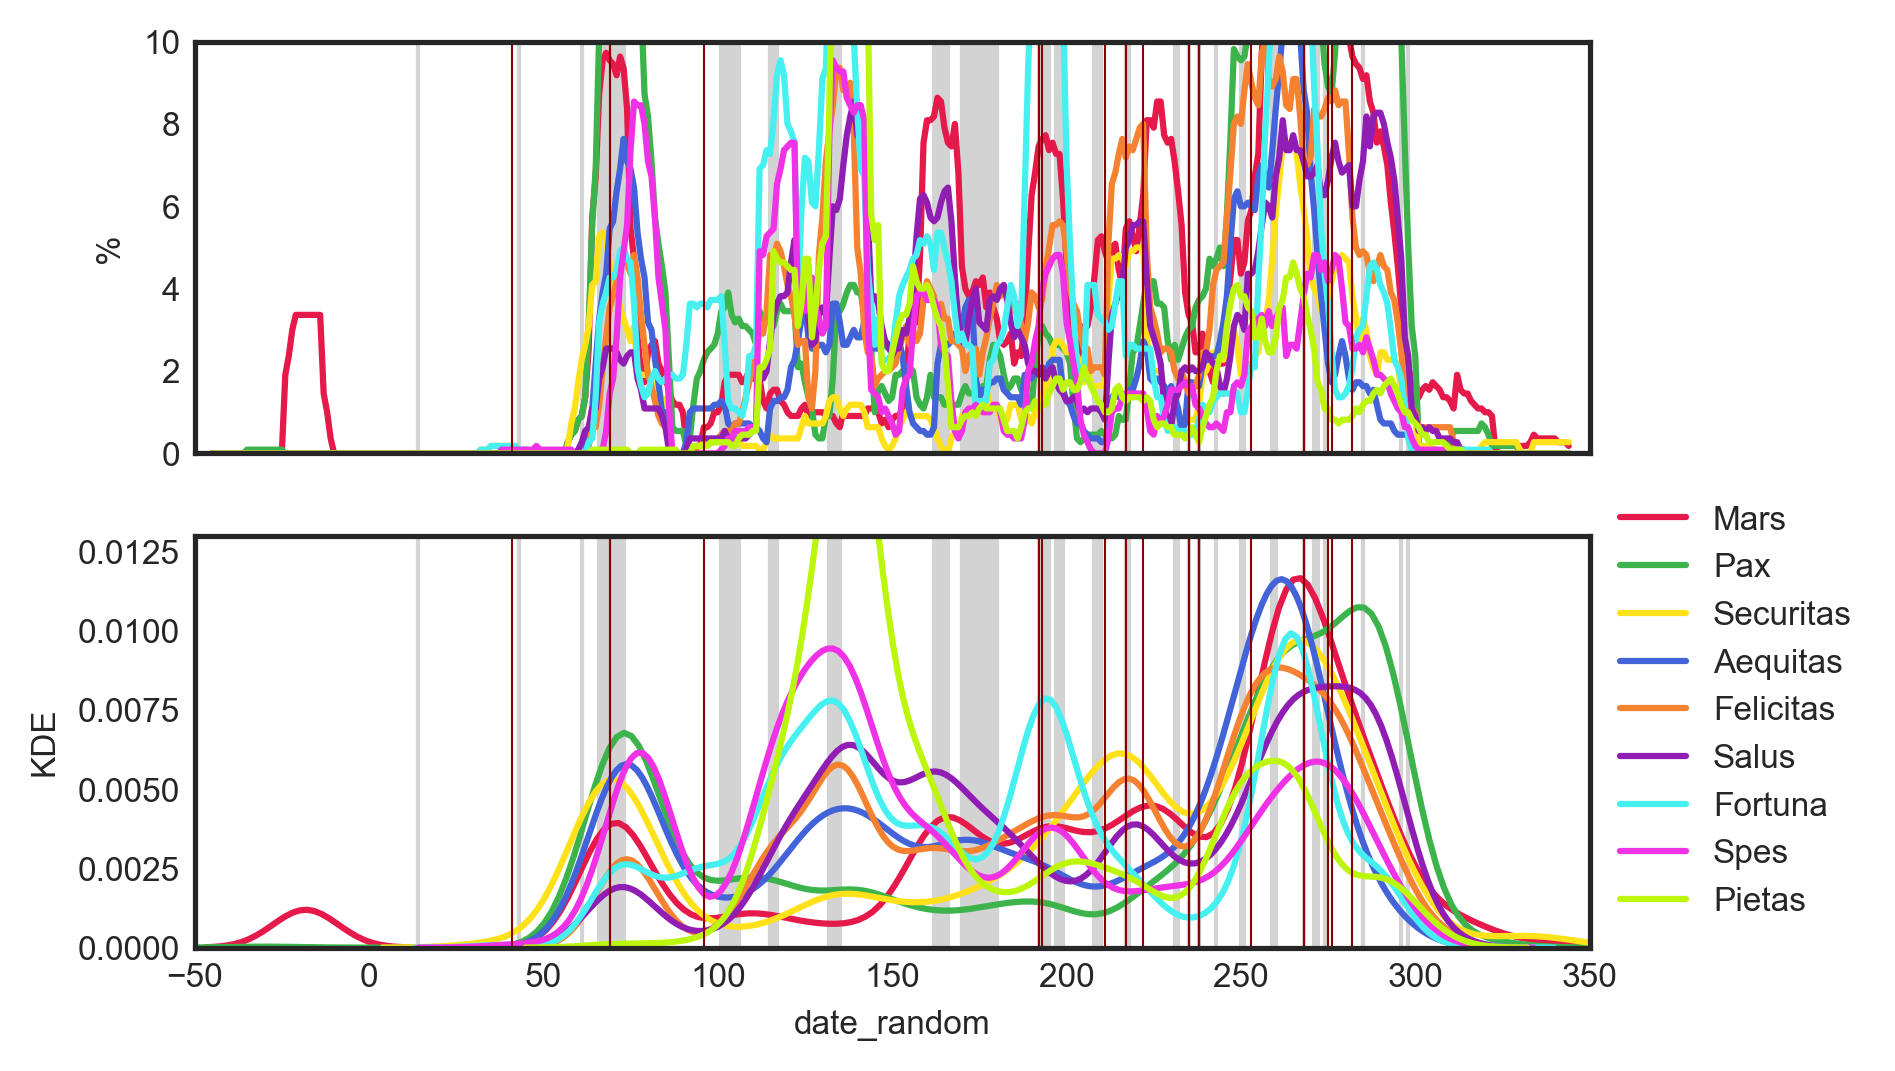

In [58]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(-50, 350)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(-50, 350)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

for n in wars.index:
    war = dict(wars.iloc[n])
    ax1.axvspan(war["Start_date"], war["End_date"], color="lightgrey")
    ax2.axvspan(war["Start_date"], war["End_date"], color="lightgrey")

for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax1.axvline(assass["Assassinated"], color="darkred", lw=0.5)
    ax2.axvline(assass["Assassinated"], color="darkred", lw=0.5)


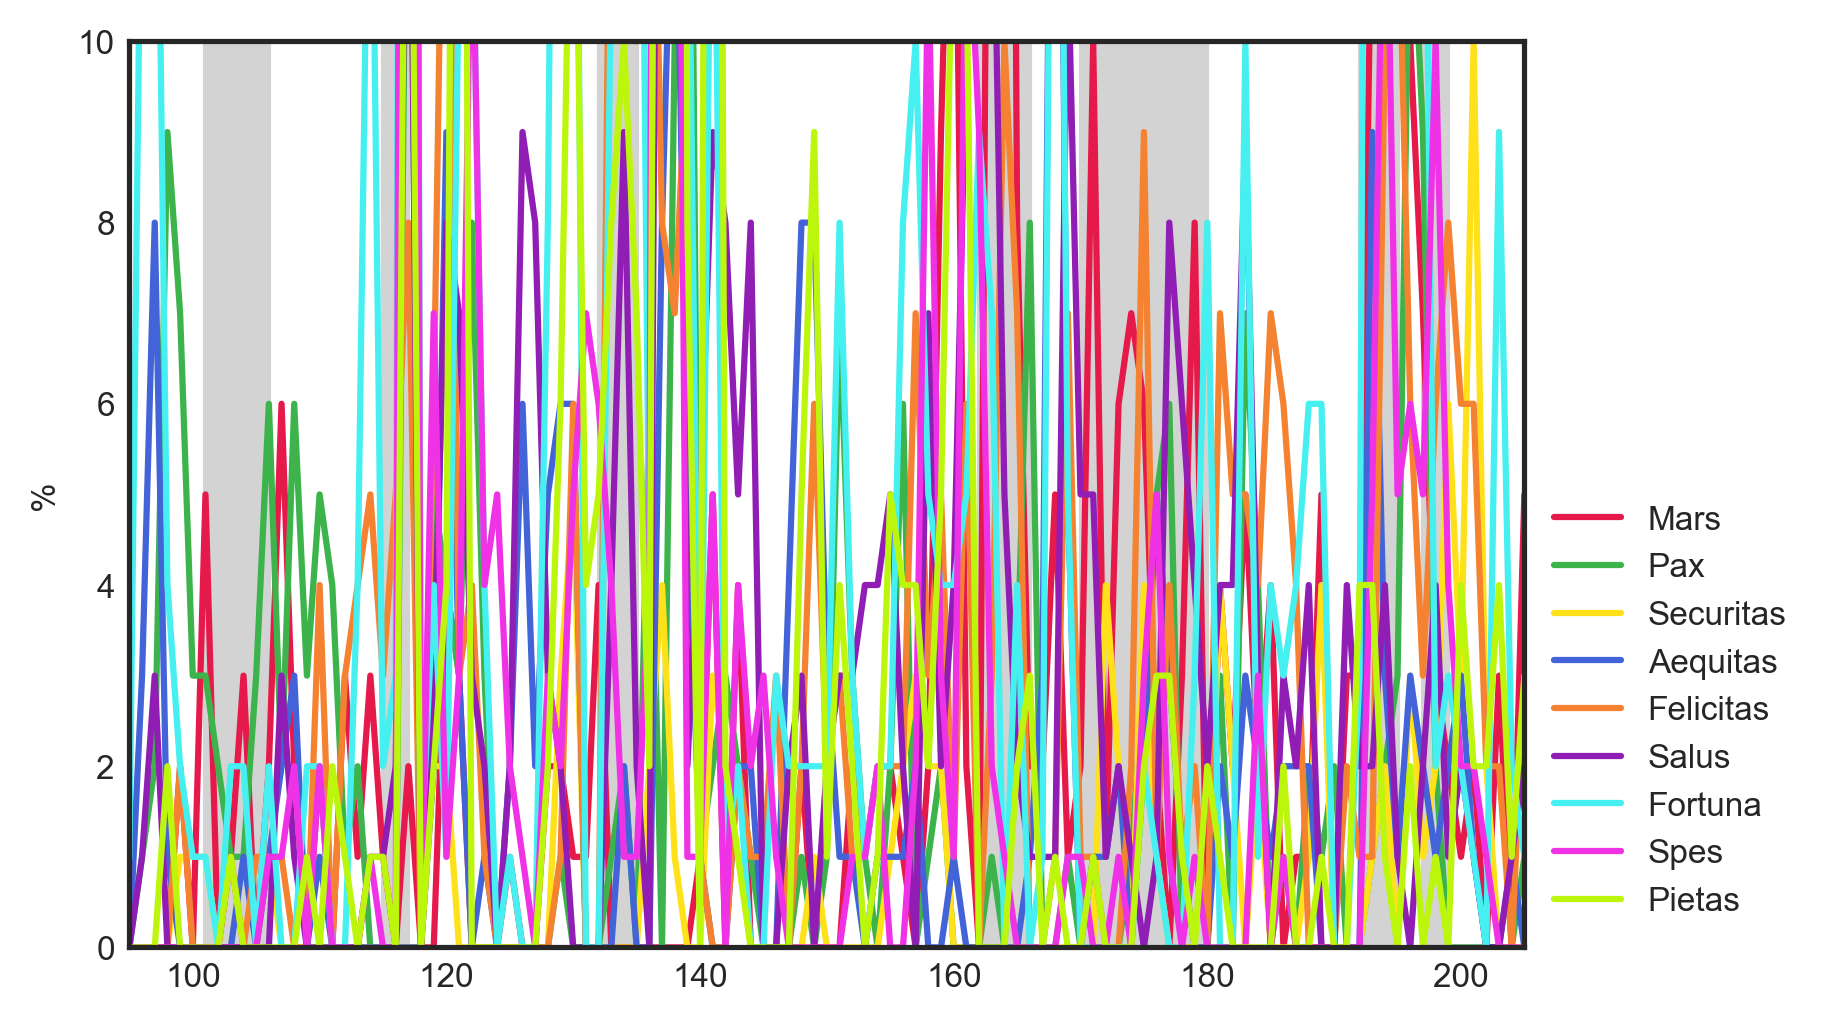

In [60]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax.plot(date_freqs_df[deity], color=color, label=deity)
    #ax.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(0, 300)
ax.set_ylim(0,10)
ax.set_ylabel("%")
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

ax.set_xlim(95,205)

for n in wars.index:
    war = dict(wars.iloc[n])
    ax.axvspan(war["Start_date"], war["End_date"], color="lightgrey")# , alpha=0.5)

# Exploring inscriptions

In [101]:
# experiments with LIRE
LIRE = gpd.read_file("/Users/kasev//Projects/LIRE_ETL/data/large_data/LIRE_v1-2.geojson", driver="GeoJSON")

In [102]:
LIRE.groupby("type_of_inscription_auto").size().sort_values(ascending=False)

type_of_inscription_auto
epitaph                            74578
votive inscription                 15700
owner/artist inscription           10460
honorific inscription               5573
building/dedicatory inscription     3241
mile-/leaguestone                   2536
identification inscription          1910
acclamation                          443
boundary inscription                 410
military diploma                     329
list                                 294
defixio                              292
letter                               288
label                                273
elogium                              150
public legal inscription             132
seat inscription                      54
private legal inscription             37
prayer                                23
assignation inscription               16
calendar                              13
adnuntiatio                            1
dtype: int64

In [103]:
deities_morphs = {
    "Pax" :     ["Pax", "Pacis", "Paci", "Pacem", "Pace"],
    "Mars":     ["Mars", "Martis", "Marti", "Martem", "Marte"],
    "Securitas":     ["Securitas", "Securitatis", "Securitati", "Securitatem", "Securitate"],
    "Aequitas":     ["Aequitas", "Aequitatis", "Aequitati", "Aequitatem", "Aequitate"],
    "Felicitas":     ["Felicitas", "Felicitatis", "Felicitati", "Felicitatem", "Felicitate"],
    "Salus":     ["Salus", "Salutis", "Saluti", "Salutem", "Salute"],
    "Fortuna":     ["Fortuna", "Fortunae", "Fortunam", "Fortunā"],
    "Spes":     ["Spes", "Spei", "Spem", "Spe"],
    "Pietas":     ["Pietas", "Pietatis", "Pietati", "Pietatem", "Pietate"]
}

In [104]:
# older functional version
def extract_deities(inscription_text):
    deities_found = []
    if not isinstance(inscription_text, str): # if not valid string
        inscription_text = ""
    for deity in deities_morphs.keys():
        for deity_morph in deities_morphs[deity]:
            try:
                if deity_morph in inscription_text: # first check it this way, otherwise skip
                    deity_morph_N = len(re.findall("(\W|^)" + deity_morph + "(\W|$)", inscription_text))
                    if deity_morph_N > 0:
                        deities_found.extend([deity] * deity_morph_N)
                        inscription_text = re.sub("(\W|^)(" + deity_morph + ")(\W|$)", r"\1", inscription_text)
            except: pass
    return deities_found

In [105]:
LIRE["deities"] = LIRE["clean_text_interpretive_word"].apply(extract_deities)

In [106]:
LIRE[LIRE["deities"].apply(bool)]["deities"].tolist()[:3]

[['Mars'], ['Fortuna'], ['Pax']]

In [107]:
LIRE[LIRE["deities"].apply(bool)].sample(100, random_state=0)[["EDCS-ID", "EDH-ID", "not_before", "not_after", "clean_text_interpretive_word", "deities"]].to_csv("../data/lire_deities_sample.csv")

In [108]:
deity = "Fortuna"
len(LIRE[LIRE["deities"].apply(lambda x: deity in x)])

595

In [109]:
LIRE["random_dates"] = LIRE.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], 1000), axis=1)

In [110]:
LIRE_deities = LIRE[LIRE["deities"].apply(bool)].copy()

[[<matplotlib.patches.Polygon at 0x31e8b7160>],

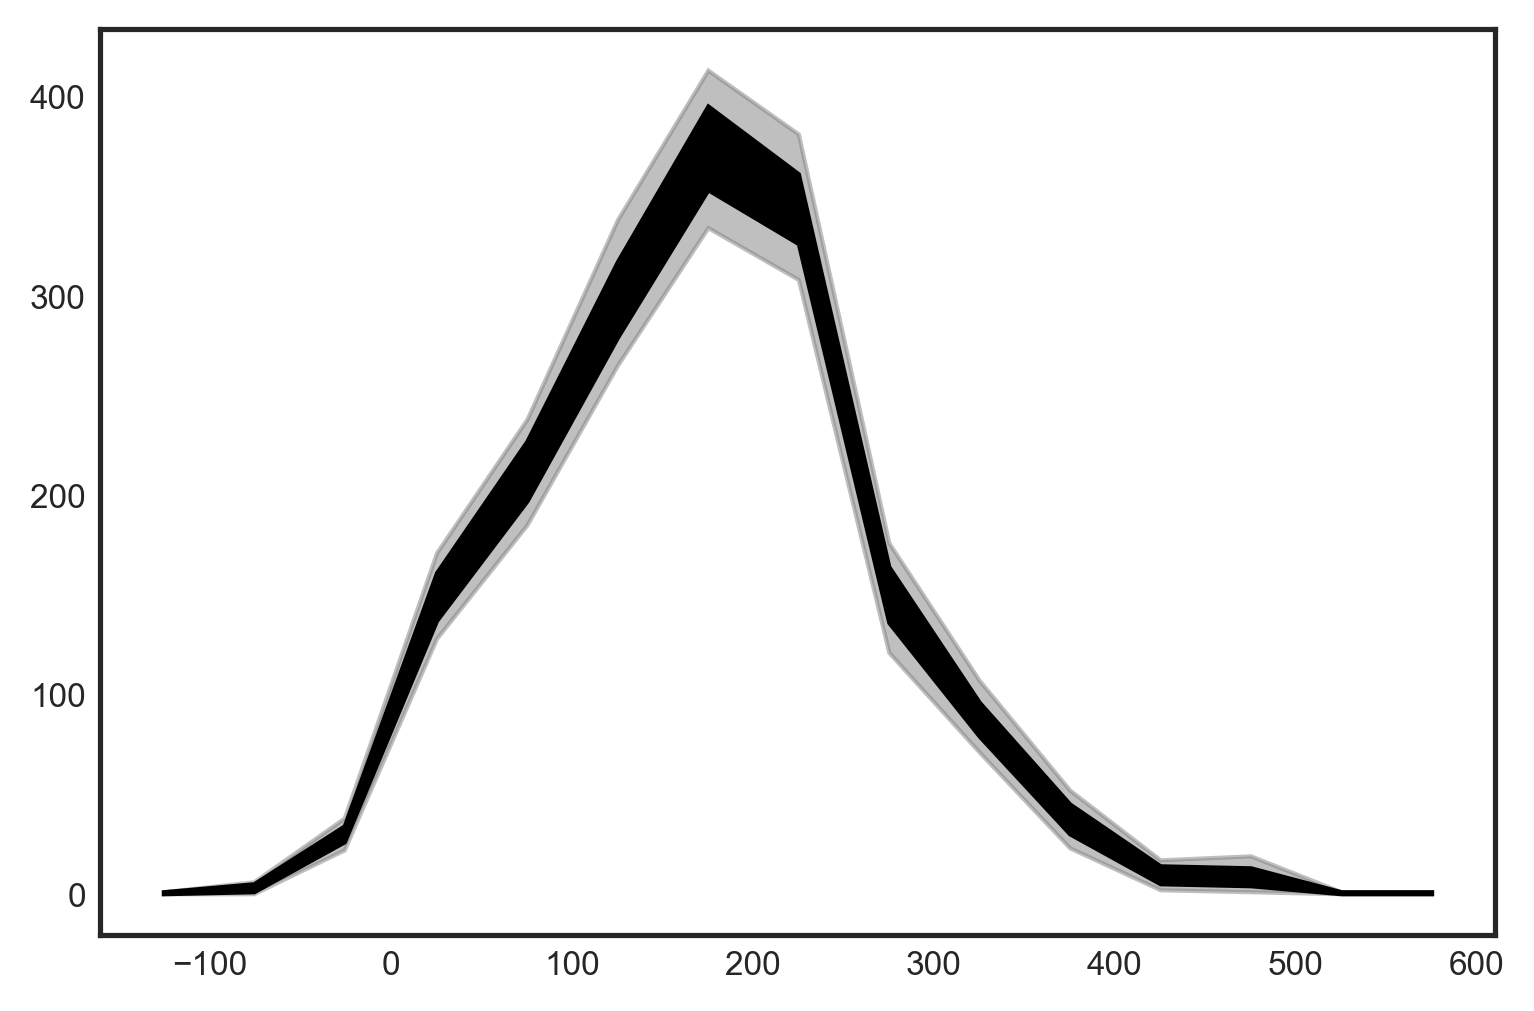

In [111]:
tempun.timeblocksplot_from_randoms(LIRE_deities["random_dates"])

In [112]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

colors_dict = dict(zip(deities_morphs.keys(), colors[:len(deities_morphs.keys())]))
colors_dict

{'Pax': '#e6194b',
 'Mars': '#3cb44b',
 'Securitas': '#ffe119',
 'Aequitas': '#4363d8',
 'Felicitas': '#f58231',
 'Salus': '#911eb4',
 'Fortuna': '#46f0f0',
 'Spes': '#f032e6',
 'Pietas': '#bcf60c'}

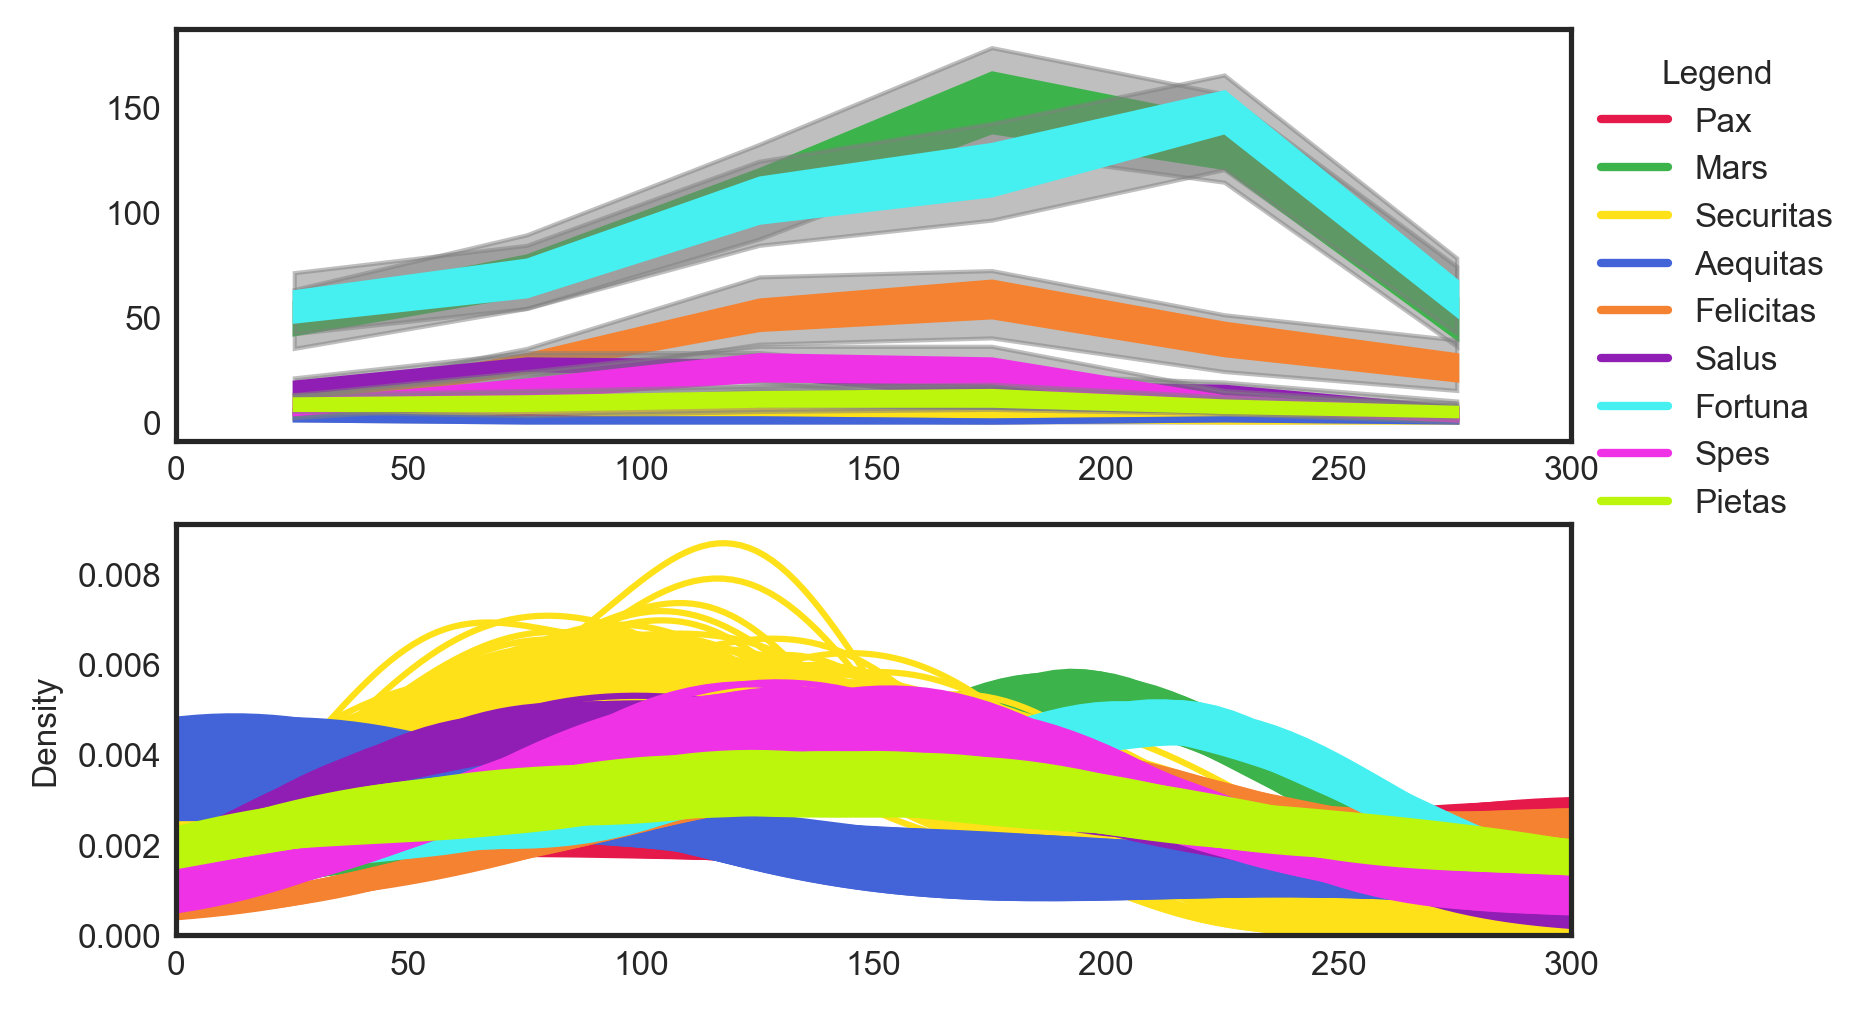

In [113]:
fig, [ax1, ax2] = plt.subplots(2,1)

for deity in deities_morphs.keys():
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[0,300,50], color=colors_dict[deity], ax=ax1)
    tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax1.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

/Users/kasev/Projects/coins/coins_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


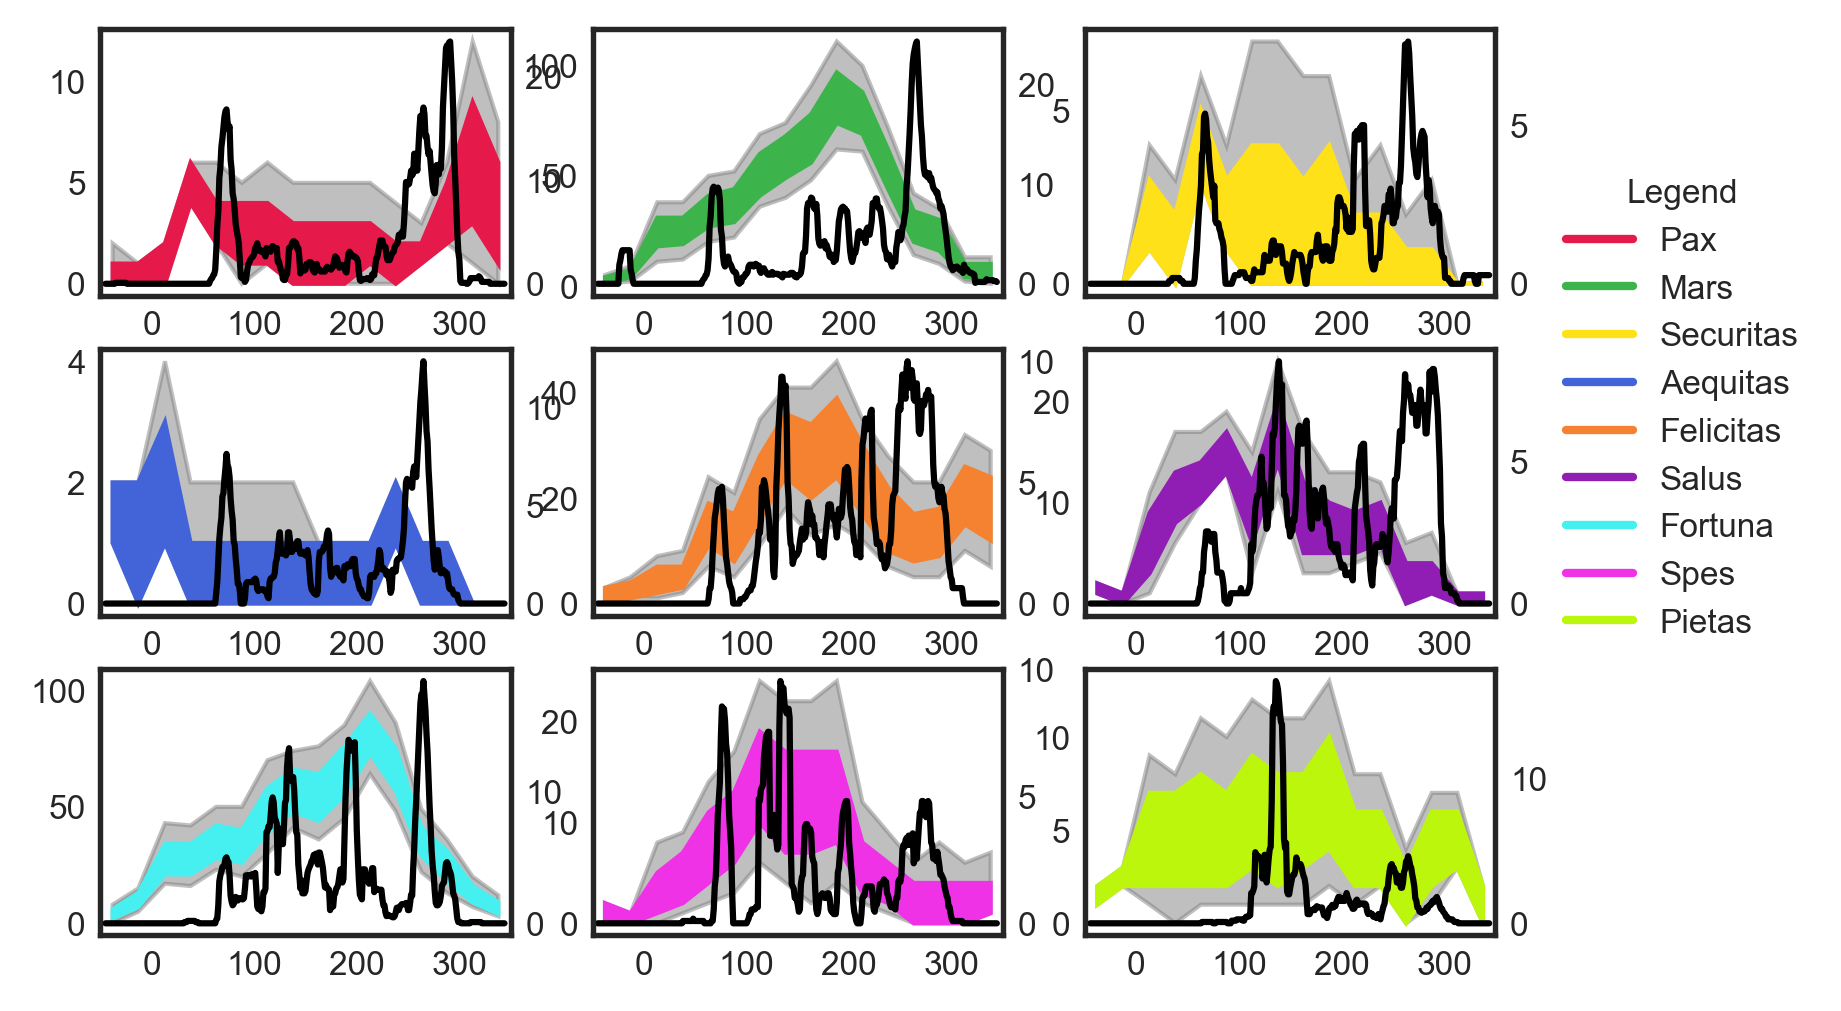

In [141]:
fig, axs = plt.subplots(3,3, tight_layout=True)

for deity, ax in zip(deities_morphs.keys(), axs.ravel()):
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[-50,350,25], color=colors_dict[deity], ax=ax)
    #tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
    ax_twinx = ax.twinx()
    ax_twinx.plot(deities_by_date_df[deity].rolling(11, center=True).mean(), color="black")
    ax.set_xlim(-50,350)
#ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1.1, 1), loc='lower left')

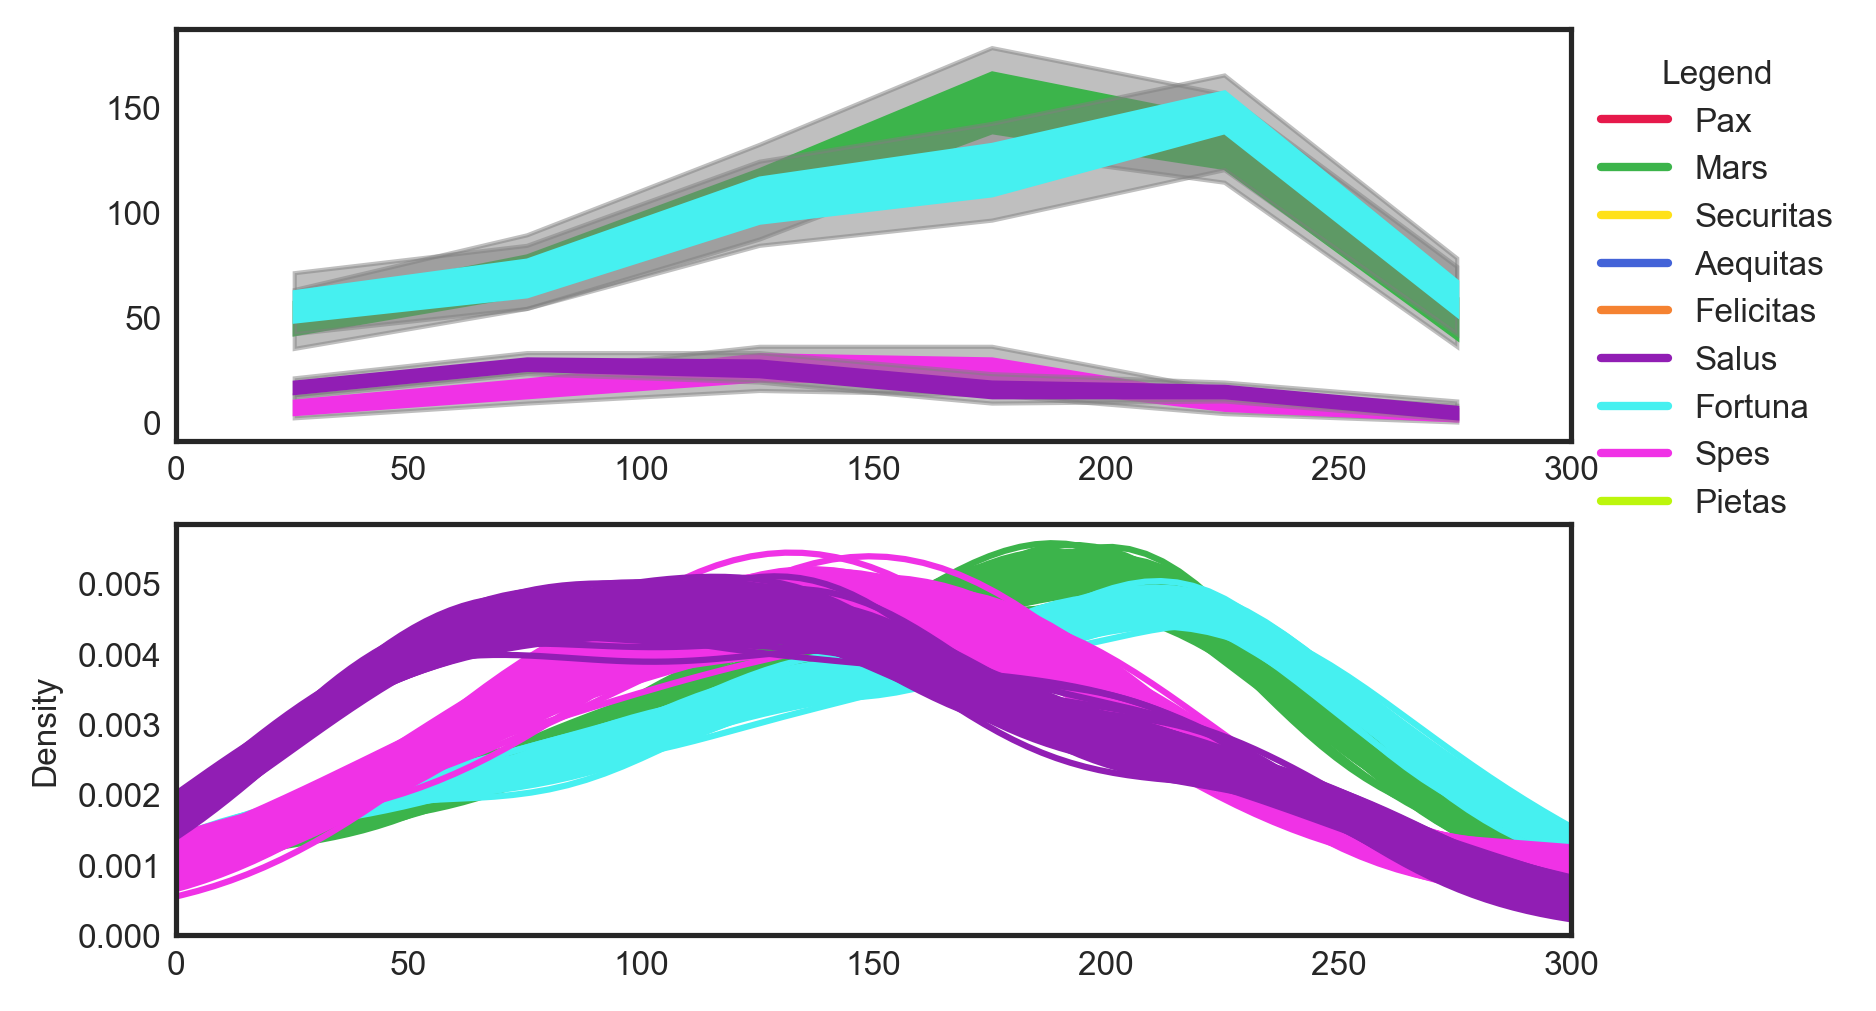

In [142]:
fig, [ax1, ax2] = plt.subplots(2,1)

for deity in ["Mars", "Fortuna", "Spes", "Salus"]:
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[0,300,50], color=colors_dict[deity], ax=ax1)
    tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2, random_size=100)

    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax1.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

# Time series analysis
- to correlate two time series data, you have to look at percentual returns, not raw data, otherwise the correlation is typically very high
-
-